<a href="https://colab.research.google.com/github/nalyzhang/MO/blob/main/sleep_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Разбор первичного датасета


In [65]:
full_df = pd.read_csv('/content/sample_data/ah_sleep.csv')
full_df.head(3)

id   timestamp  \
0  applehealth_sleep_2261472_58c9063982329c8111fd...  1715115443   
1  applehealth_sleep_2261472_a547bfb3709c8af9b90b...  1730481861   
2  applehealth_sleep_2261472_e3ec8989eb733107ab6b...  1727954727   

   data_version          data_type  \
0             2  applehealth_sleep   
1             2  applehealth_sleep   
2             2  applehealth_sleep   

                                                data     provider  user_id  
0  [{"dataType":"category","entryType":"sleep","h...  applehealth  2261472  
1  [{"dataType":"category","entryType":"sleep","h...  applehealth  2261472  
2  [{"dataType":"category","entryType":"sleep","h...  applehealth  2261472

In [66]:
import json


def flatten_dict(d, prefix=''):
    items = {}
    for key, value in d.items():
        if isinstance(value, dict):
            items.update(flatten_dict(value, key))
        else:
            items[key] = value
    return items


full_df['data'] = full_df['data'].apply(json.loads)

data_list=[]
for index, row in full_df.iterrows():
    data_list.append(flatten_dict(row['data'][0]))

df = pd.DataFrame(data_list)
df.head()

dataType entryType                         health_kit_id        HKTimeZone  \
0  category     sleep  ABCD13F9-CAB2-42E8-BEFB-63C855FC3307     Europe/Vienna   
1  category     sleep  4CDBEAB5-8229-452C-831E-3436152F94CA               NaN   
2  category     sleep  BAE77E9A-1490-4901-B42D-E6026AB0E97B               NaN   
3  category     sleep  BCCD626F-CD18-42A7-8BB5-D1675EB1CE74               NaN   
4  category     sleep  101079AB-EC9E-483C-9429-6762D23A4271  Europe/Podgorica   

                                    bundleIdentifier operatingSystemVersion  \
0  com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...                 17.4.1   
1                            com.tantsissa.AutoSleep                 18.0.0   
2                            com.tantsissa.AutoSleep                 18.0.0   
3                            com.tantsissa.AutoSleep                 17.5.1   
4  com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...                 17.3.0   

  productType      sourceName  version sourceGroup  ... stagesAwake  \
0  iPhone15,2  iPhone Аннушка   17.4.1   HealthKit  ...         NaN   
1  iPhone15,2       AutoSleep  6.11.21   HealthKit  ...       870.0   
2  iPhone15,2       AutoSleep  6.10.30   HealthKit  ...      5340.0   
3  iPhone15,2       AutoSleep  6.10.30   HealthKit  ...      2010.0   
4  iPhone15,2  iPhone Аннушка     17.3   HealthKit  ...         NaN   

  stagesDeep stagesLight stagesREM  stagesSleep usingStages HKExternalUUID  \
0        NaN         NaN       NaN          NaN         NaN            NaN   
1     2670.0     18750.0    3600.0      25020.0         Yes            NaN   
2     1500.0     15510.0    4500.0      21510.0         NaN            NaN   
3     2250.0     23760.0    4140.0      30150.0         NaN            NaN   
4        NaN         NaN       NaN          NaN         NaN            NaN   

  HKMetadataKeySyncIdentifier HKMetadataKeySyncVersion HKWasUserEntered  
0                         NaN                      NaN              NaN  
1                         NaN                      NaN              NaN  
2                         NaN                      NaN              NaN  
3                         NaN                      NaN              NaN  
4                         NaN                      NaN              NaN  

[5 rows x 38 columns]

В датасете сразу видно, что много пропущенных значений.

In [67]:
df.columns

Index(['dataType', 'entryType', 'health_kit_id', 'HKTimeZone',
       'bundleIdentifier', 'operatingSystemVersion', 'productType',
       'sourceName', 'version', 'sourceGroup', 'sourceType', 'timeEnd',
       'timeStart', 'value', 'Asleep', 'Average HR', 'Average RespRate',
       'Average SpO2', 'Daytime HR', 'Deep Sleep', 'Energy Threshold',
       'Lights', 'Max RespRate', 'Max SpO2', 'Min RespRate', 'Min SpO2',
       'Rating', 'Recharge', 'stagesAwake', 'stagesDeep', 'stagesLight',
       'stagesREM', 'stagesSleep', 'usingStages', 'HKExternalUUID',
       'HKMetadataKeySyncIdentifier', 'HKMetadataKeySyncVersion',
       'HKWasUserEntered'],
      dtype='object')

In [68]:
df.isna().sum()

dataType                         0
entryType                        0
health_kit_id                    0
HKTimeZone                      92
bundleIdentifier                 0
operatingSystemVersion           0
productType                      0
sourceName                       0
version                          0
sourceGroup                      0
sourceType                       0
timeEnd                          0
timeStart                        0
value                            0
Asleep                         154
Average HR                     154
Average RespRate               154
Average SpO2                   207
Daytime HR                     154
Deep Sleep                     154
Energy Threshold               154
Lights                         154
Max RespRate                   154
Max SpO2                       207
Min RespRate                   154
Min SpO2                       207
Rating                         154
Recharge                       154
stagesAwake                    161
stagesDeep                     161
stagesLight                    161
stagesREM                      161
stagesSleep                    161
usingStages                    231
HKExternalUUID                 235
HKMetadataKeySyncIdentifier    235
HKMetadataKeySyncVersion       235
HKWasUserEntered               239
dtype: int64

In [69]:
df.shape[0]

240

Пропущенных значений достаточно много. У большей части атрибутов их больше, чем в 50% записей.


In [70]:
df.nunique()

dataType                         1
entryType                        1
health_kit_id                  230
HKTimeZone                       8
bundleIdentifier                 7
operatingSystemVersion          13
productType                      3
sourceName                       7
version                         20
sourceGroup                      1
sourceType                       1
timeEnd                        228
timeStart                      228
value                            4
Asleep                          66
Average HR                      78
Average RespRate                81
Average SpO2                    28
Daytime HR                      80
Deep Sleep                      80
Energy Threshold                 1
Lights                           1
Max RespRate                    17
Max SpO2                         4
Min RespRate                    12
Min SpO2                         8
Rating                          80
Recharge                        30
stagesAwake                     55
stagesDeep                      50
stagesLight                     66
stagesREM                       60
stagesSleep                     66
usingStages                      1
HKExternalUUID                   5
HKMetadataKeySyncIdentifier      5
HKMetadataKeySyncVersion         5
HKWasUserEntered                 1
dtype: int64

В датасете есть колонки с одинаковыми значениями: dataType, entryType, sourceGroup, sourceType, Energy Threshold, Lights, usingStages, HKWasUserEntered. Такие признаки не содержат информации, поэтому удалим их.

In [71]:
drop_list = ['dataType', 'entryType', 'sourceGroup', 'sourceType', 'Energy Threshold', 'Lights', 'usingStages', 'HKWasUserEntered']

for drop_col in drop_list:
  df.drop(drop_col, inplace=True, axis=1)

df.head()

health_kit_id        HKTimeZone  \
0  ABCD13F9-CAB2-42E8-BEFB-63C855FC3307     Europe/Vienna   
1  4CDBEAB5-8229-452C-831E-3436152F94CA               NaN   
2  BAE77E9A-1490-4901-B42D-E6026AB0E97B               NaN   
3  BCCD626F-CD18-42A7-8BB5-D1675EB1CE74               NaN   
4  101079AB-EC9E-483C-9429-6762D23A4271  Europe/Podgorica   

                                    bundleIdentifier operatingSystemVersion  \
0  com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...                 17.4.1   
1                            com.tantsissa.AutoSleep                 18.0.0   
2                            com.tantsissa.AutoSleep                 18.0.0   
3                            com.tantsissa.AutoSleep                 17.5.1   
4  com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...                 17.3.0   

  productType      sourceName  version                   timeEnd  \
0  iPhone15,2  iPhone Аннушка   17.4.1  2024-05-07T08:25:29+0200   
1  iPhone15,2       AutoSleep  6.11.21  2024-10-31T07:00:00+0100   
2  iPhone15,2       AutoSleep  6.10.30  2024-10-02T06:42:00+0200   
3  iPhone15,2       AutoSleep  6.10.30  2024-06-29T08:37:00+0200   
4  iPhone15,2  iPhone Аннушка     17.3  2024-02-01T05:41:17+0100   

                  timeStart   value  ...  Rating Recharge stagesAwake  \
0  2024-05-07T00:22:00+0200  in_bed  ...     NaN      NaN         NaN   
1  2024-10-30T23:53:00+0100  in_bed  ...   70.73       87       870.0   
2  2024-10-02T00:07:00+0200  in_bed  ...   54.86       74      5340.0   
3  2024-06-28T23:31:00+0200  in_bed  ...   75.88       99      2010.0   
4  2024-01-31T22:25:00+0100  in_bed  ...     NaN      NaN         NaN   

  stagesDeep stagesLight stagesREM stagesSleep HKExternalUUID  \
0        NaN         NaN       NaN         NaN            NaN   
1     2670.0     18750.0    3600.0     25020.0            NaN   
2     1500.0     15510.0    4500.0     21510.0            NaN   
3     2250.0     23760.0    4140.0     30150.0            NaN   
4        NaN         NaN       NaN         NaN            NaN   

  HKMetadataKeySyncIdentifier HKMetadataKeySyncVersion  
0                         NaN                      NaN  
1                         NaN                      NaN  
2                         NaN                      NaN  
3                         NaN                      NaN  
4                         NaN                      NaN  

[5 rows x 30 columns]

In [72]:
df.isna().sum()

health_kit_id                    0
HKTimeZone                      92
bundleIdentifier                 0
operatingSystemVersion           0
productType                      0
sourceName                       0
version                          0
timeEnd                          0
timeStart                        0
value                            0
Asleep                         154
Average HR                     154
Average RespRate               154
Average SpO2                   207
Daytime HR                     154
Deep Sleep                     154
Max RespRate                   154
Max SpO2                       207
Min RespRate                   154
Min SpO2                       207
Rating                         154
Recharge                       154
stagesAwake                    161
stagesDeep                     161
stagesLight                    161
stagesREM                      161
stagesSleep                    161
HKExternalUUID                 235
HKMetadataKeySyncIdentifier    235
HKMetadataKeySyncVersion       235
dtype: int64

Также удалим колонки, где слишком много пропущенных значений, а именно: HKExternalUUID, HKMetadataKeySyncIdentifier, HKMetadataKeySyncVersion, Average SpO2, Max SpO2, Min SpO2

In [73]:
drop_list = ['HKExternalUUID', 'HKMetadataKeySyncIdentifier', 'HKMetadataKeySyncVersion', 'Average SpO2', 'Max SpO2', 'Min SpO2']

for drop_col in drop_list:
  df.drop(drop_col, inplace=True, axis=1)

df.head()

health_kit_id        HKTimeZone  \
0  ABCD13F9-CAB2-42E8-BEFB-63C855FC3307     Europe/Vienna   
1  4CDBEAB5-8229-452C-831E-3436152F94CA               NaN   
2  BAE77E9A-1490-4901-B42D-E6026AB0E97B               NaN   
3  BCCD626F-CD18-42A7-8BB5-D1675EB1CE74               NaN   
4  101079AB-EC9E-483C-9429-6762D23A4271  Europe/Podgorica   

                                    bundleIdentifier operatingSystemVersion  \
0  com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...                 17.4.1   
1                            com.tantsissa.AutoSleep                 18.0.0   
2                            com.tantsissa.AutoSleep                 18.0.0   
3                            com.tantsissa.AutoSleep                 17.5.1   
4  com.apple.health.285A5E5B-B5D6-4182-BC34-9A821...                 17.3.0   

  productType      sourceName  version                   timeEnd  \
0  iPhone15,2  iPhone Аннушка   17.4.1  2024-05-07T08:25:29+0200   
1  iPhone15,2       AutoSleep  6.11.21  2024-10-31T07:00:00+0100   
2  iPhone15,2       AutoSleep  6.10.30  2024-10-02T06:42:00+0200   
3  iPhone15,2       AutoSleep  6.10.30  2024-06-29T08:37:00+0200   
4  iPhone15,2  iPhone Аннушка     17.3  2024-02-01T05:41:17+0100   

                  timeStart   value  ...  Deep Sleep Max RespRate  \
0  2024-05-07T00:22:00+0200  in_bed  ...         NaN          NaN   
1  2024-10-30T23:53:00+0100  in_bed  ...       12510      22.5000   
2  2024-10-02T00:07:00+0200  in_bed  ...        8738      23.0000   
3  2024-06-28T23:31:00+0200  in_bed  ...        9500      18.5000   
4  2024-01-31T22:25:00+0100  in_bed  ...         NaN          NaN   

  Min RespRate Rating Recharge stagesAwake stagesDeep stagesLight stagesREM  \
0          NaN    NaN      NaN         NaN        NaN         NaN       NaN   
1      15.0000  70.73       87       870.0     2670.0     18750.0    3600.0   
2      17.5000  54.86       74      5340.0     1500.0     15510.0    4500.0   
3      15.0000  75.88       99      2010.0     2250.0     23760.0    4140.0   
4          NaN    NaN      NaN         NaN        NaN         NaN       NaN   

   stagesSleep  
0          NaN  
1      25020.0  
2      21510.0  
3      30150.0  
4          NaN  

[5 rows x 24 columns]

In [74]:
df.isna().sum()

health_kit_id               0
HKTimeZone                 92
bundleIdentifier            0
operatingSystemVersion      0
productType                 0
sourceName                  0
version                     0
timeEnd                     0
timeStart                   0
value                       0
Asleep                    154
Average HR                154
Average RespRate          154
Daytime HR                154
Deep Sleep                154
Max RespRate              154
Min RespRate              154
Rating                    154
Recharge                  154
stagesAwake               161
stagesDeep                161
stagesLight               161
stagesREM                 161
stagesSleep               161
dtype: int64

Удалим строки с большим количеством пропущеных значений.

In [75]:
df_1 = df.dropna(subset=['Asleep'])

In [76]:
df_2 = df.dropna(subset=['HKTimeZone'])

# Разбор df_1  


In [77]:
df_1.head()

health_kit_id HKTimeZone         bundleIdentifier  \
1   4CDBEAB5-8229-452C-831E-3436152F94CA        NaN  com.tantsissa.AutoSleep   
2   BAE77E9A-1490-4901-B42D-E6026AB0E97B        NaN  com.tantsissa.AutoSleep   
3   BCCD626F-CD18-42A7-8BB5-D1675EB1CE74        NaN  com.tantsissa.AutoSleep   
6   D8E7F33D-3292-495E-843D-67CC4DB59C63        NaN  com.tantsissa.AutoSleep   
15  355FDA47-396C-4FCB-8739-D1FE36CC56B7        NaN  com.tantsissa.AutoSleep   

   operatingSystemVersion productType sourceName  version  \
1                  18.0.0  iPhone15,2  AutoSleep  6.11.21   
2                  18.0.0  iPhone15,2  AutoSleep  6.10.30   
3                  17.5.1  iPhone15,2  AutoSleep  6.10.30   
6                  17.5.1  iPhone15,2  AutoSleep  6.10.30   
15                 17.6.1  iPhone15,2  AutoSleep  6.10.30   

                     timeEnd                 timeStart   value  ...  \
1   2024-10-31T07:00:00+0100  2024-10-30T23:53:00+0100  in_bed  ...   
2   2024-10-02T06:42:00+0200  2024-10-02T00:07:00+0200  in_bed  ...   
3   2024-06-29T08:37:00+0200  2024-06-28T23:31:00+0200  in_bed  ...   
6   2024-07-07T07:43:00+0200  2024-07-06T23:19:00+0200  in_bed  ...   
15  2024-09-07T06:46:00+0200  2024-09-06T22:59:00+0200  in_bed  ...   

    Deep Sleep Max RespRate Min RespRate Rating Recharge stagesAwake  \
1        12510      22.5000      15.0000  70.73       87       870.0   
2         8738      23.0000      17.5000  54.86       74      5340.0   
3         9500      18.5000      15.0000  75.88       99      2010.0   
6         9220      19.5000      14.0000  73.31       96      1290.0   
15        9729      20.0000      14.5000  61.70       83      2100.0   

   stagesDeep stagesLight stagesREM  stagesSleep  
1      2670.0     18750.0    3600.0      25020.0  
2      1500.0     15510.0    4500.0      21510.0  
3      2250.0     23760.0    4140.0      30150.0  
6      2640.0     21390.0    4830.0      28860.0  
15     3870.0     17910.0    3570.0      25350.0  

[5 rows x 24 columns]

In [78]:
df_1.shape[0]

86

In [79]:
df_1.isna().sum()

health_kit_id              0
HKTimeZone                86
bundleIdentifier           0
operatingSystemVersion     0
productType                0
sourceName                 0
version                    0
timeEnd                    0
timeStart                  0
value                      0
Asleep                     0
Average HR                 0
Average RespRate           0
Daytime HR                 0
Deep Sleep                 0
Max RespRate               0
Min RespRate               0
Rating                     0
Recharge                   0
stagesAwake                7
stagesDeep                 7
stagesLight                7
stagesREM                  7
stagesSleep                7
dtype: int64

Признак HKTimeZone отсутствует у данного датасета. Удалим его.

In [80]:
df_1.drop('HKTimeZone', inplace=True, axis=1)

<ipython-input-80-c4eeb76fc449>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop('HKTimeZone', inplace=True, axis=1)


In [81]:
df_1.nunique()

health_kit_id             85
bundleIdentifier           1
operatingSystemVersion     5
productType                1
sourceName                 1
version                    2
timeEnd                   82
timeStart                 82
value                      1
Asleep                    66
Average HR                78
Average RespRate          81
Daytime HR                80
Deep Sleep                80
Max RespRate              17
Min RespRate              12
Rating                    80
Recharge                  30
stagesAwake               55
stagesDeep                50
stagesLight               66
stagesREM                 60
stagesSleep               66
dtype: int64

Удалим ненужные признаки:

* health_kit_id - так как это идентифиркатор;

* productType, sourceName, value - так как это уникальные значения.

In [82]:
drop_list = ['health_kit_id', 'bundleIdentifier', 'productType', 'sourceName', 'value']

for drop_col in drop_list:
  df_1.drop(drop_col, inplace=True, axis=1)

df_1.head()

<ipython-input-82-465676ac4a14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(drop_col, inplace=True, axis=1)
<ipython-input-82-465676ac4a14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(drop_col, inplace=True, axis=1)
<ipython-input-82-465676ac4a14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(drop_col, inplace=True, axis=1)
<ipython-input-82-465676ac4a14>:4: SettingWithCopyWarning: 
A value is

operatingSystemVersion  version                   timeEnd  \
1                  18.0.0  6.11.21  2024-10-31T07:00:00+0100   
2                  18.0.0  6.10.30  2024-10-02T06:42:00+0200   
3                  17.5.1  6.10.30  2024-06-29T08:37:00+0200   
6                  17.5.1  6.10.30  2024-07-07T07:43:00+0200   
15                 17.6.1  6.10.30  2024-09-07T06:46:00+0200   

                   timeStart   Asleep Average HR Average RespRate Daytime HR  \
1   2024-10-30T23:53:00+0100  25020.0      63.50          16.7564      84.27   
2   2024-10-02T00:07:00+0200  21360.0      73.44          19.9405      93.23   
3   2024-06-28T23:31:00+0200  28500.0      66.26          16.8250      79.53   
6   2024-07-06T23:19:00+0200  27660.0      68.31          16.7167      81.00   
15  2024-09-06T22:59:00+0200  23880.0      68.74          16.3942      84.09   

   Deep Sleep Max RespRate Min RespRate Rating Recharge  stagesAwake  \
1       12510      22.5000      15.0000  70.73       87        870.0   
2        8738      23.0000      17.5000  54.86       74       5340.0   
3        9500      18.5000      15.0000  75.88       99       2010.0   
6        9220      19.5000      14.0000  73.31       96       1290.0   
15       9729      20.0000      14.5000  61.70       83       2100.0   

    stagesDeep  stagesLight  stagesREM  stagesSleep  
1       2670.0      18750.0     3600.0      25020.0  
2       1500.0      15510.0     4500.0      21510.0  
3       2250.0      23760.0     4140.0      30150.0  
6       2640.0      21390.0     4830.0      28860.0  
15      3870.0      17910.0     3570.0      25350.0

Переформатируем время, так как для анализа не требуется дата, а только время отхода ко сну и время подъема. И, чтобы ранжировать время, возьмем только часы. (заодно переведем дату в числовой признак)


In [83]:
from datetime import datetime

def date_to_time(date_time_str):
  dt = datetime.strptime(date_time_str, "%Y-%m-%dT%H:%M:%S%z")
  return dt.hour

df_1['timeEnd'] = df_1['timeEnd'].apply(date_to_time)
df_1['timeStart'] = df_1['timeStart'].apply(date_to_time)

df_1.head()

<ipython-input-83-1886cdbd2c85>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['timeEnd'] = df_1['timeEnd'].apply(date_to_time)
<ipython-input-83-1886cdbd2c85>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['timeStart'] = df_1['timeStart'].apply(date_to_time)


operatingSystemVersion  version  timeEnd  timeStart   Asleep Average HR  \
1                  18.0.0  6.11.21        7         23  25020.0      63.50   
2                  18.0.0  6.10.30        6          0  21360.0      73.44   
3                  17.5.1  6.10.30        8         23  28500.0      66.26   
6                  17.5.1  6.10.30        7         23  27660.0      68.31   
15                 17.6.1  6.10.30        6         22  23880.0      68.74   

   Average RespRate Daytime HR Deep Sleep Max RespRate Min RespRate Rating  \
1           16.7564      84.27      12510      22.5000      15.0000  70.73   
2           19.9405      93.23       8738      23.0000      17.5000  54.86   
3           16.8250      79.53       9500      18.5000      15.0000  75.88   
6           16.7167      81.00       9220      19.5000      14.0000  73.31   
15          16.3942      84.09       9729      20.0000      14.5000  61.70   

   Recharge  stagesAwake  stagesDeep  stagesLight  stagesREM  stagesSleep  
1        87        870.0      2670.0      18750.0     3600.0      25020.0  
2        74       5340.0      1500.0      15510.0     4500.0      21510.0  
3        99       2010.0      2250.0      23760.0     4140.0      30150.0  
6        96       1290.0      2640.0      21390.0     4830.0      28860.0  
15       83       2100.0      3870.0      17910.0     3570.0      25350.0

In [84]:
df_1.describe()

timeEnd  timeStart        Asleep  stagesAwake   stagesDeep  \
count  86.000000  86.000000     86.000000    79.000000    79.000000   
mean    7.337209  13.604651  25052.093023  2234.050633  2828.734177   
std     1.656435  11.111498   5115.182503  2094.772810   802.157934   
min     2.000000   0.000000   9720.000000   150.000000   750.000000   
25%     7.000000   0.000000  23040.000000   900.000000  2385.000000   
50%     7.000000  22.000000  25110.000000  1440.000000  2850.000000   
75%     8.000000  23.000000  27555.000000  2700.000000  3435.000000   
max    18.000000  23.000000  51420.000000  9960.000000  4290.000000   

        stagesLight    stagesREM   stagesSleep  
count     79.000000    79.000000     79.000000  
mean   18694.177215  4877.468354  26400.379747  
std     3175.140460  1485.760160   3740.595881  
min     9630.000000   930.000000  14250.000000  
25%    16620.000000  4005.000000  24075.000000  
50%    18750.000000  4800.000000  27030.000000  
75%    20910.000000  5910.000000  28470.000000  
max    27300.000000  8520.000000  35220.000000

Посмотрим на гистограммы и боксплоты

In [85]:
df_1.dtypes

operatingSystemVersion     object
version                    object
timeEnd                     int64
timeStart                   int64
Asleep                    float64
Average HR                 object
Average RespRate           object
Daytime HR                 object
Deep Sleep                 object
Max RespRate               object
Min RespRate               object
Rating                     object
Recharge                   object
stagesAwake               float64
stagesDeep                float64
stagesLight               float64
stagesREM                 float64
stagesSleep               float64
dtype: object

In [86]:
int_list = ['Average HR', 'Average RespRate', 'Daytime HR', 'Deep Sleep', 'Max RespRate', 'Min RespRate', 'Rating', 'Recharge']

for feature in int_list:
  df_1[feature] = df_1[feature].apply(lambda x: float(x))

df_1.head()

<ipython-input-86-f2128786de0a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[feature] = df_1[feature].apply(lambda x: float(x))


operatingSystemVersion  version  timeEnd  timeStart   Asleep  Average HR  \
1                  18.0.0  6.11.21        7         23  25020.0       63.50   
2                  18.0.0  6.10.30        6          0  21360.0       73.44   
3                  17.5.1  6.10.30        8         23  28500.0       66.26   
6                  17.5.1  6.10.30        7         23  27660.0       68.31   
15                 17.6.1  6.10.30        6         22  23880.0       68.74   

    Average RespRate  Daytime HR  Deep Sleep  Max RespRate  Min RespRate  \
1            16.7564       84.27     12510.0          22.5          15.0   
2            19.9405       93.23      8738.0          23.0          17.5   
3            16.8250       79.53      9500.0          18.5          15.0   
6            16.7167       81.00      9220.0          19.5          14.0   
15           16.3942       84.09      9729.0          20.0          14.5   

    Rating  Recharge  stagesAwake  stagesDeep  stagesLight  stagesREM  \
1    70.73      87.0        870.0      2670.0      18750.0     3600.0   
2    54.86      74.0       5340.0      1500.0      15510.0     4500.0   
3    75.88      99.0       2010.0      2250.0      23760.0     4140.0   
6    73.31      96.0       1290.0      2640.0      21390.0     4830.0   
15   61.70      83.0       2100.0      3870.0      17910.0     3570.0   

    stagesSleep  
1       25020.0  
2       21510.0  
3       30150.0  
6       28860.0  
15      25350.0

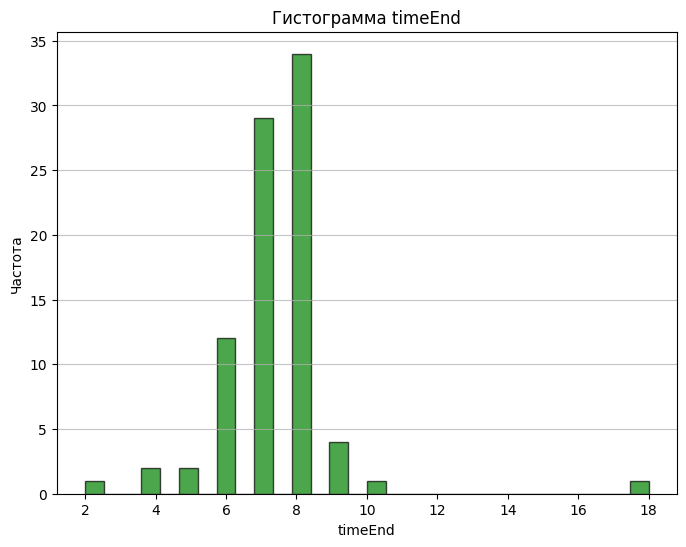

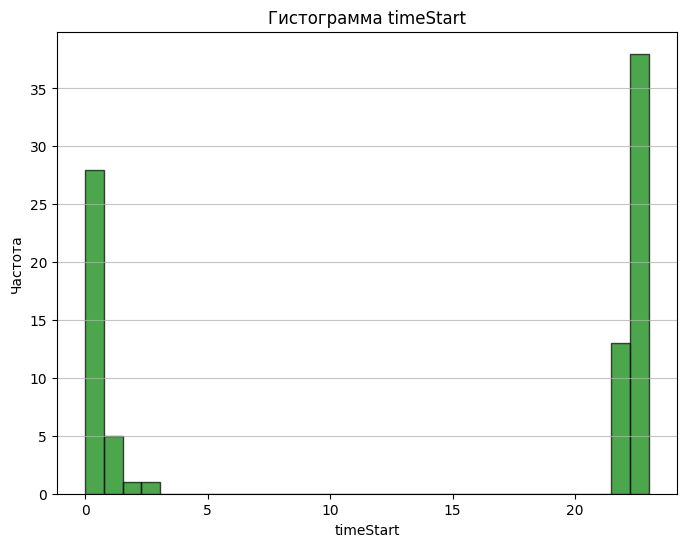

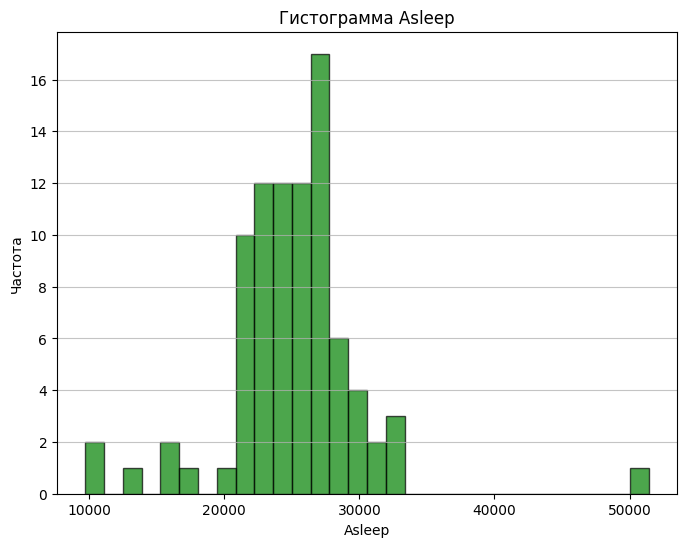

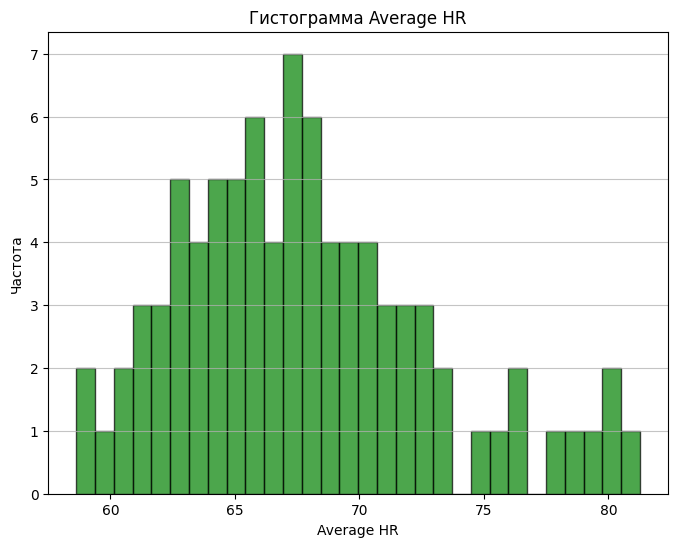

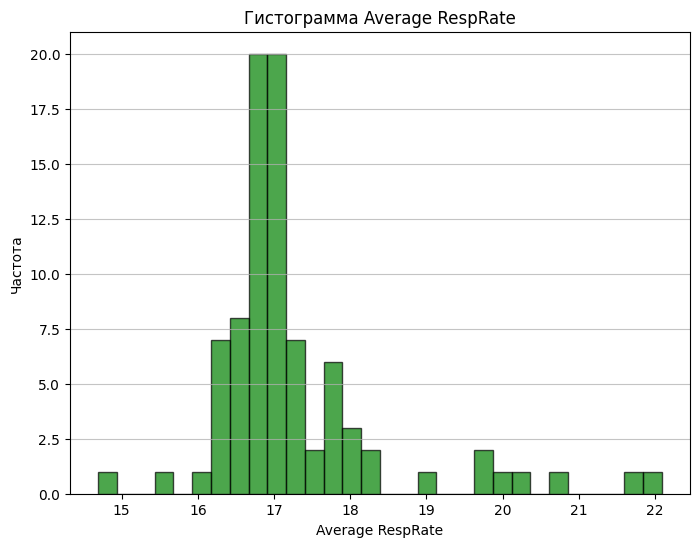

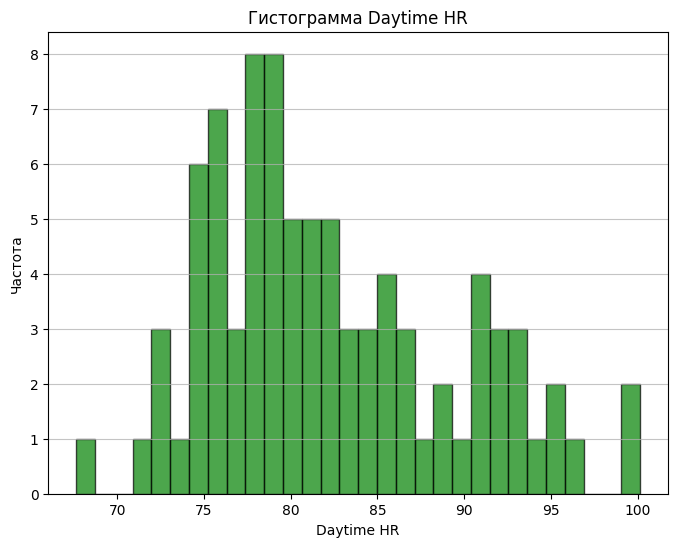

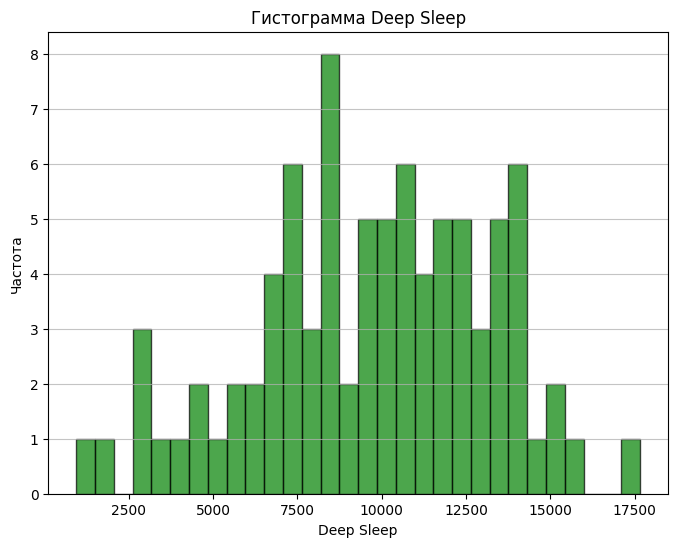

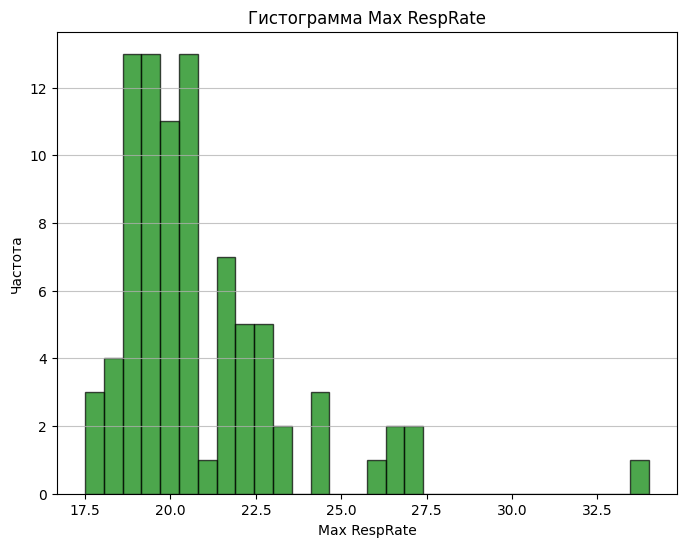

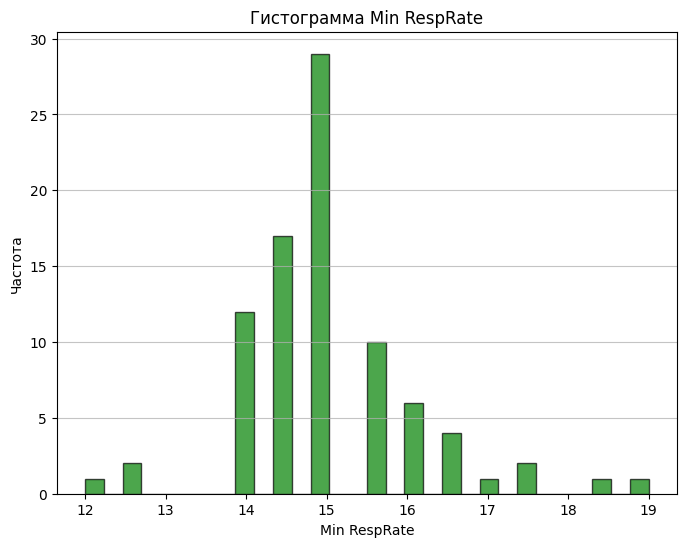

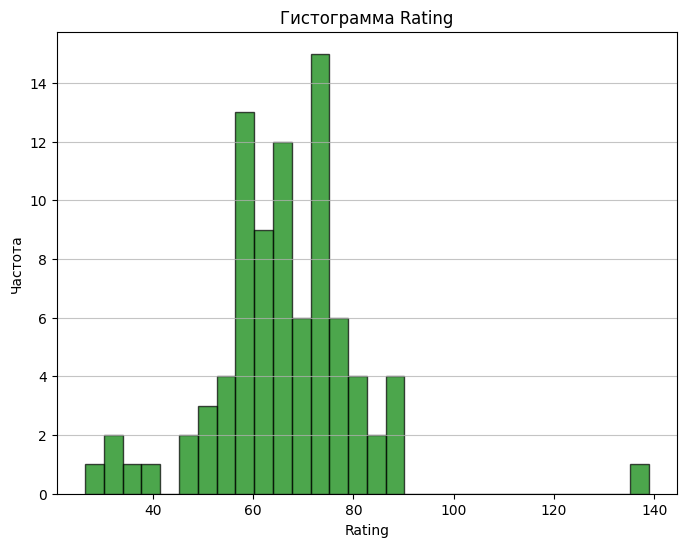

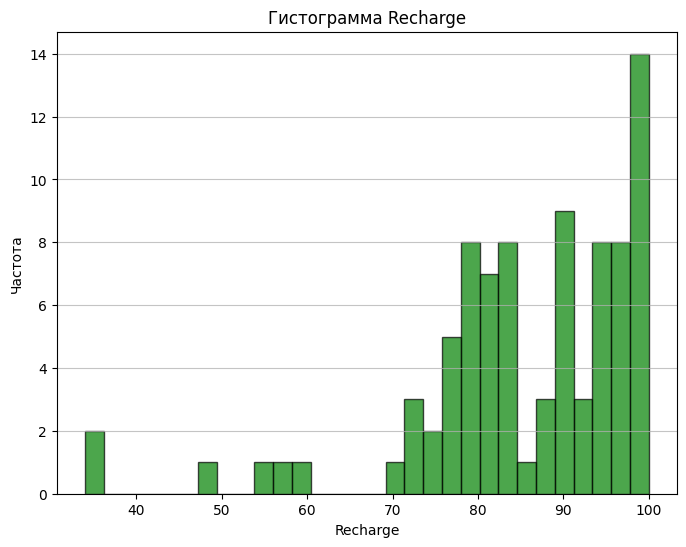

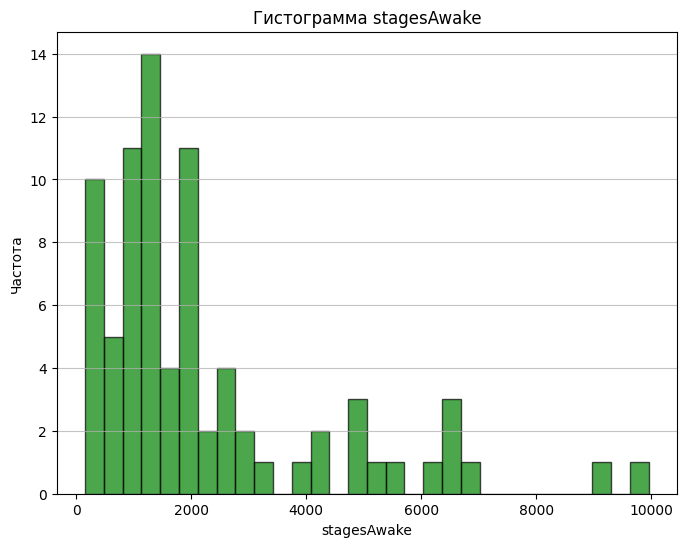

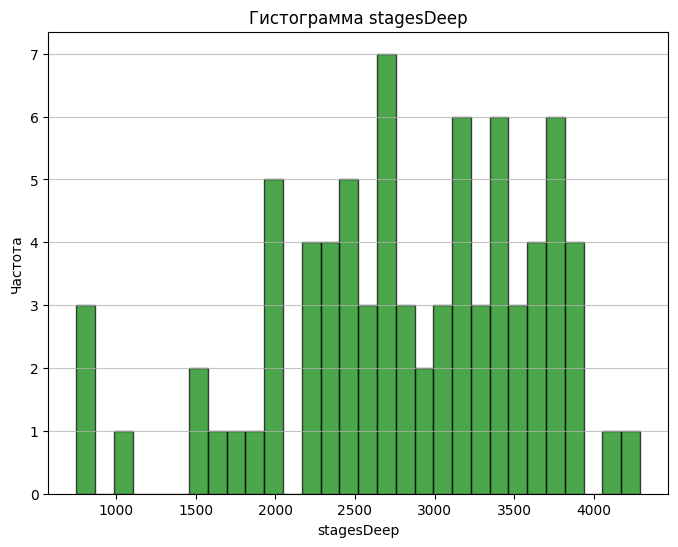

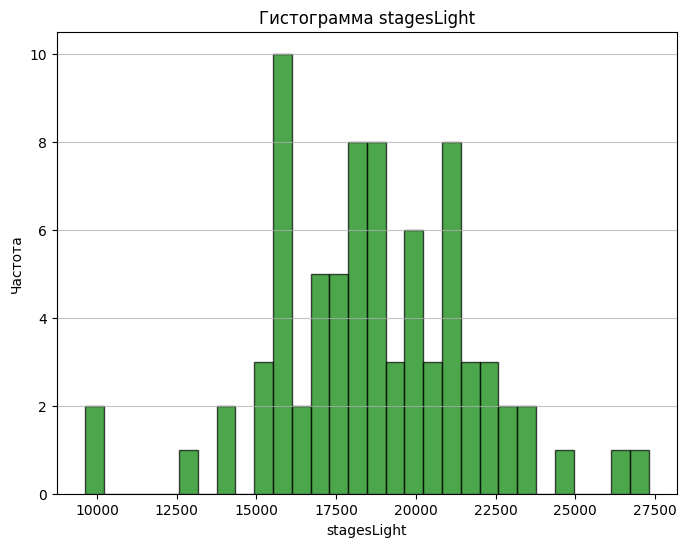

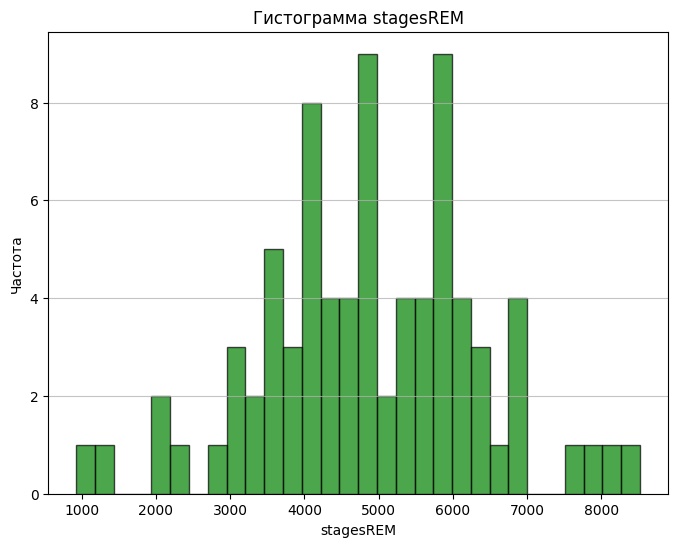

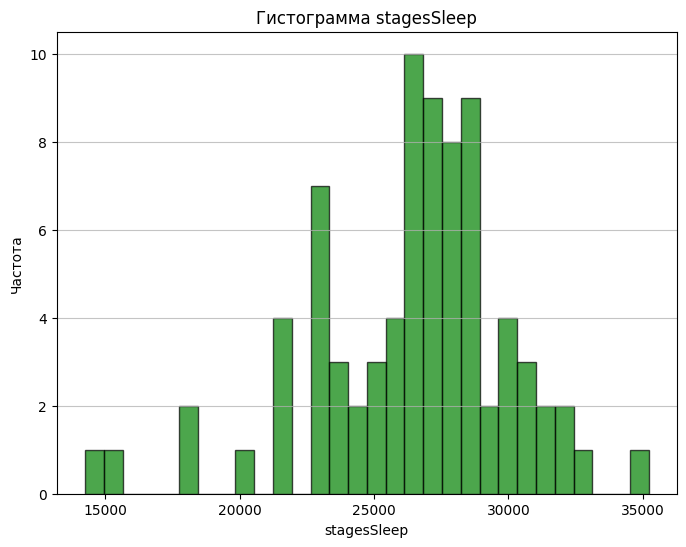

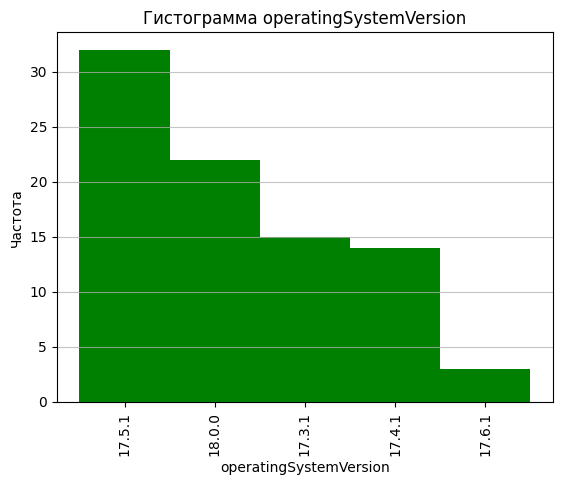

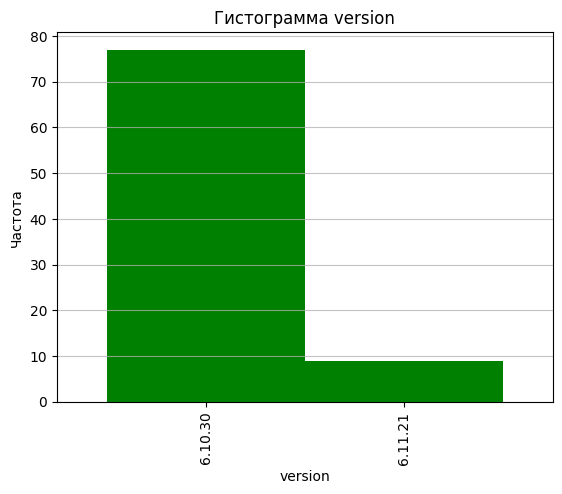

In [87]:
categorical_features = ['operatingSystemVersion', 'version']

numerical_features = [x for x in df_1.columns if x not in categorical_features]

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df_1[feature], bins=30, alpha=0.7, color='green', edgecolor='black')
    plt.title(f'Гистограмма {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

for feature in categorical_features:
    df_1[feature].value_counts().plot(kind='bar', width=1, color='green')
    plt.title(f'Гистограмма {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

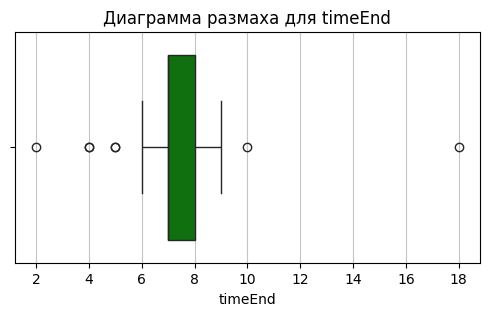

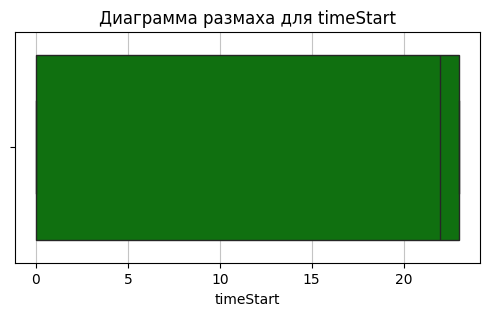

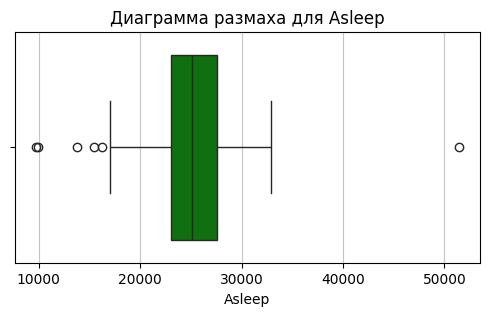

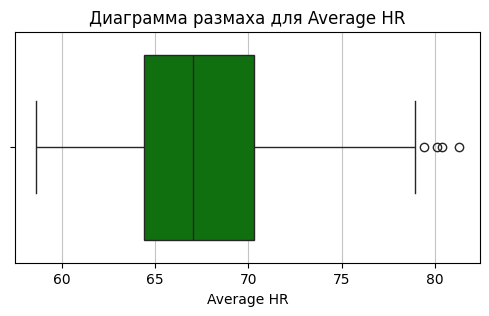

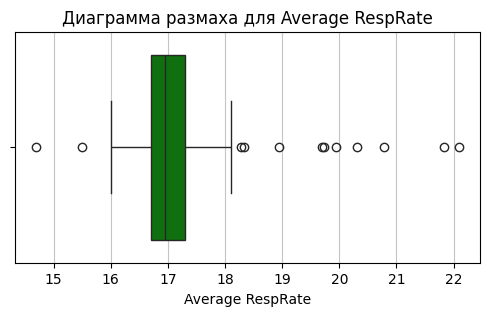

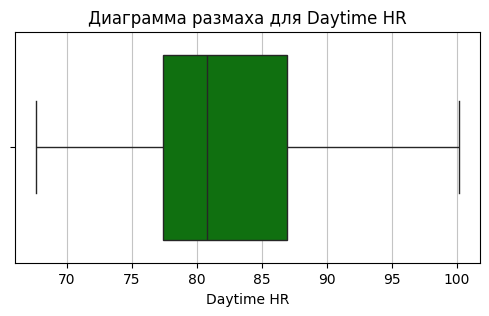

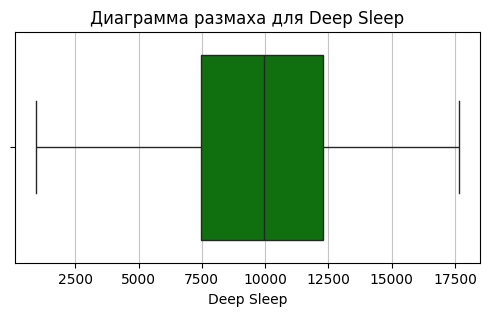

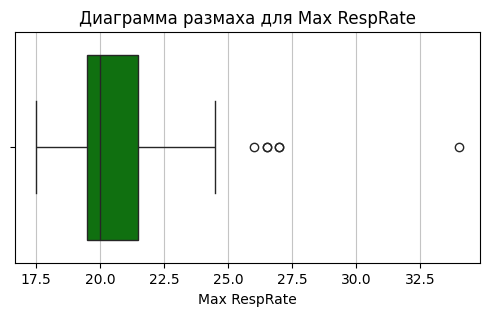

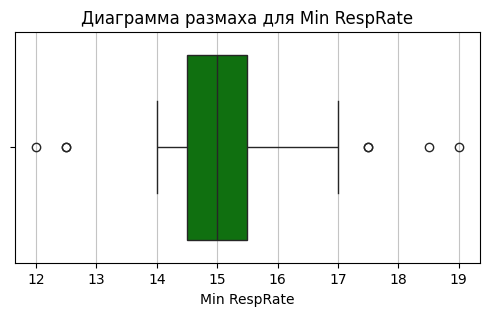

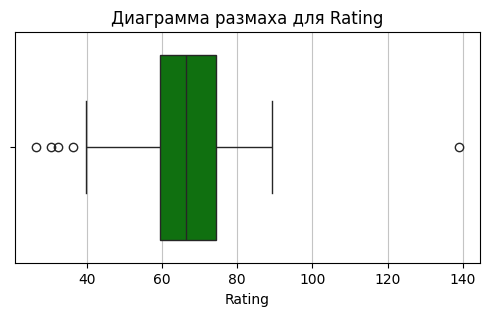

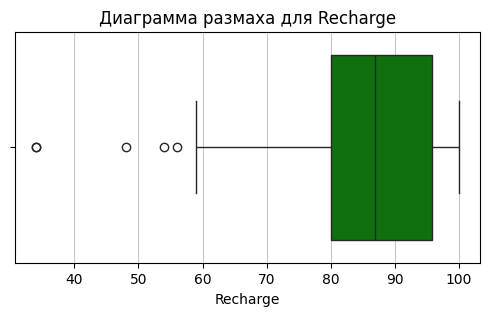

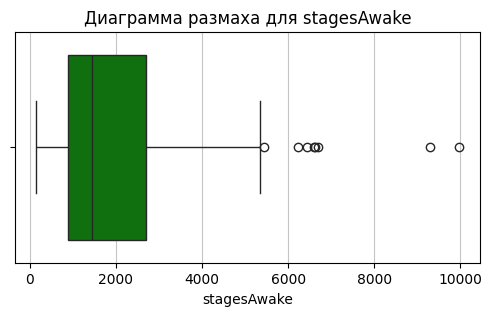

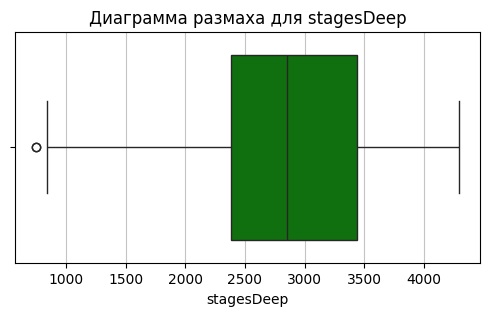

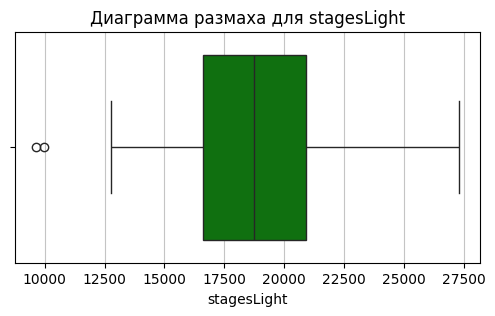

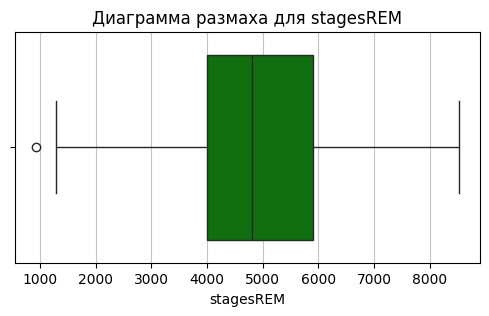

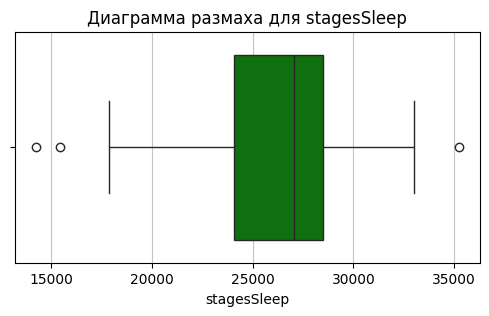

In [88]:
for num in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_1[num], color='green')
    plt.title(f'Диаграмма размаха для {num}')
    plt.xlabel(num)
    plt.grid(axis='x', alpha=0.75)
    plt.show()

В данном случае наличие выбросов - это естесственно, так как это результат работы человека над собой, а он может быть разным, поэтому их мы не трогаем.

Построим графики зависимостей одной переменной от другой.


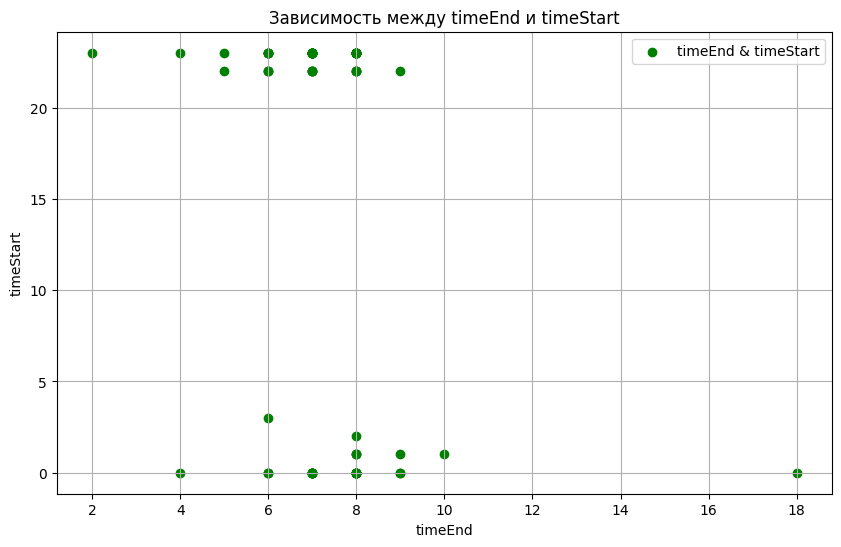

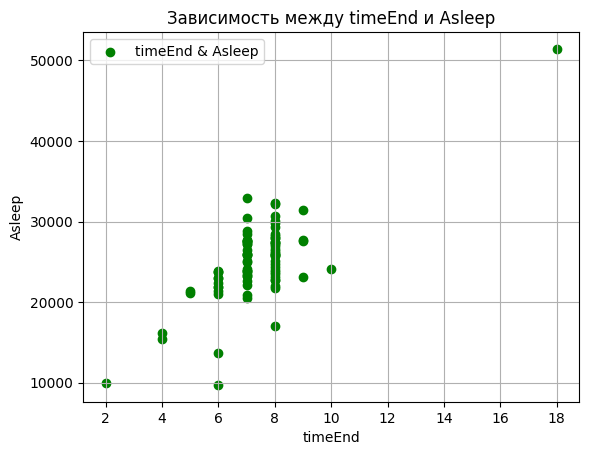

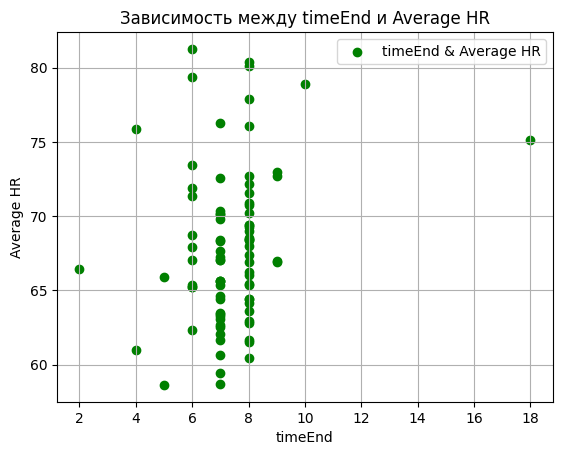

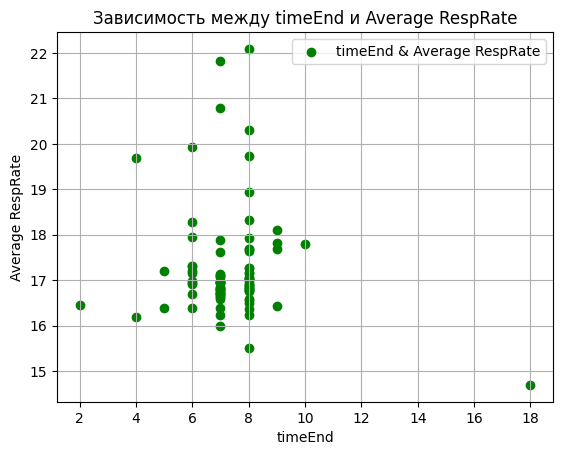

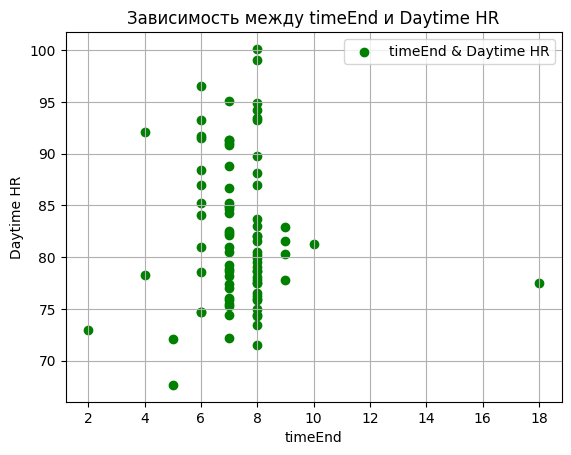

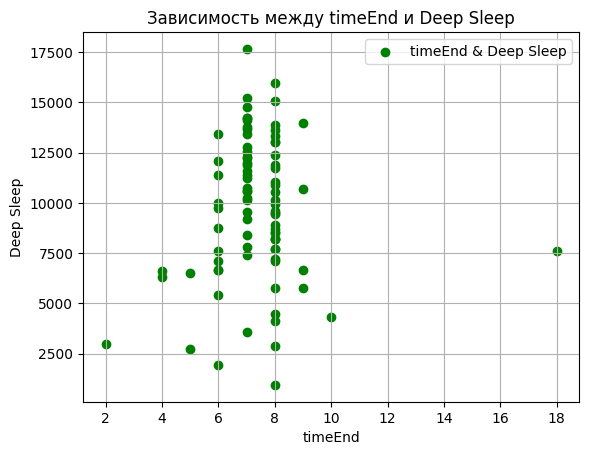

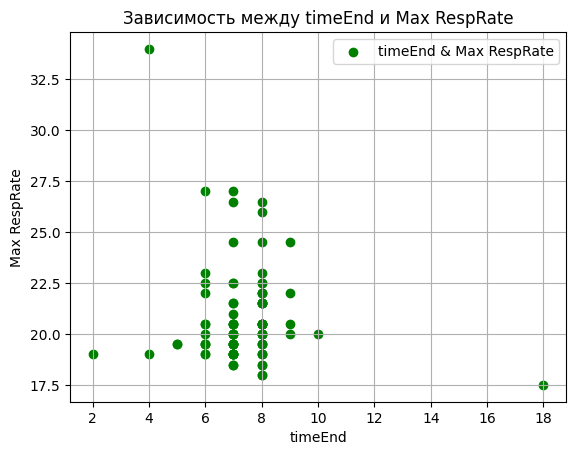

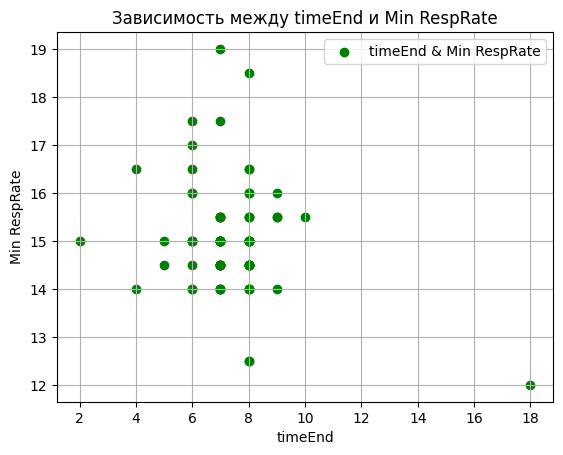

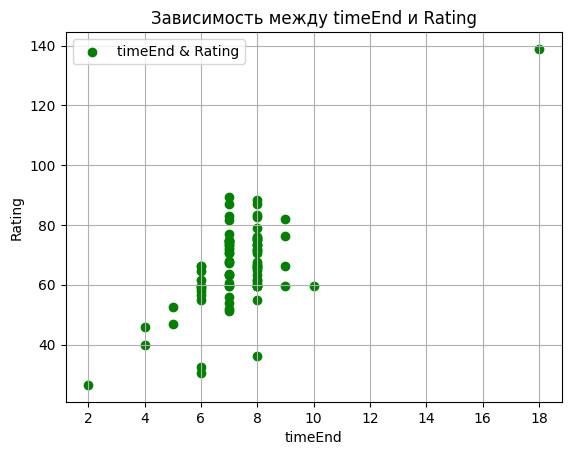

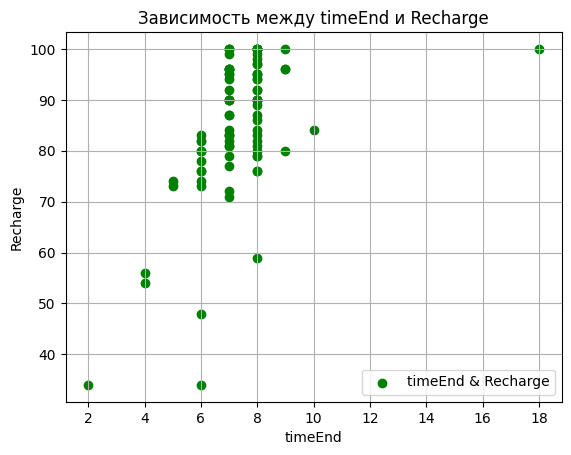

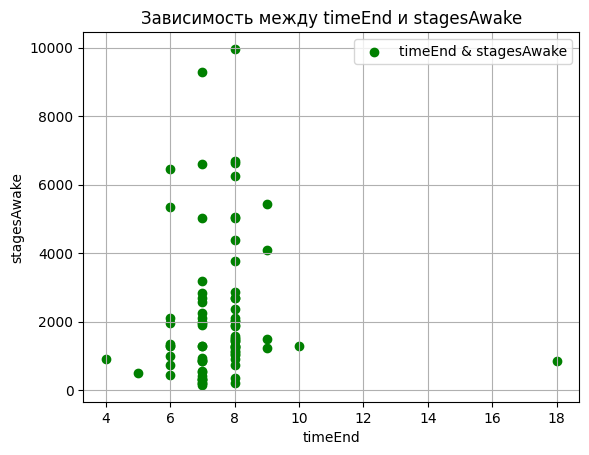

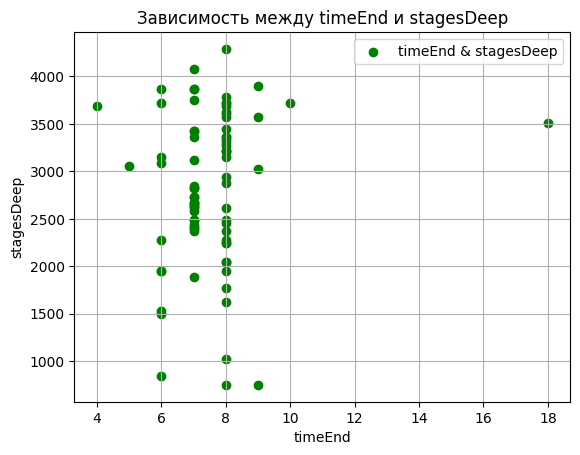

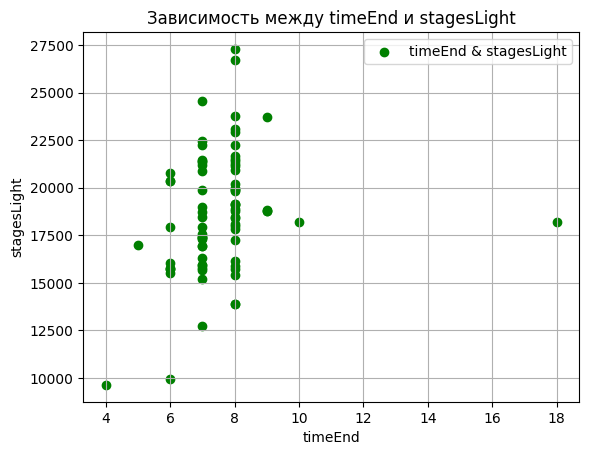

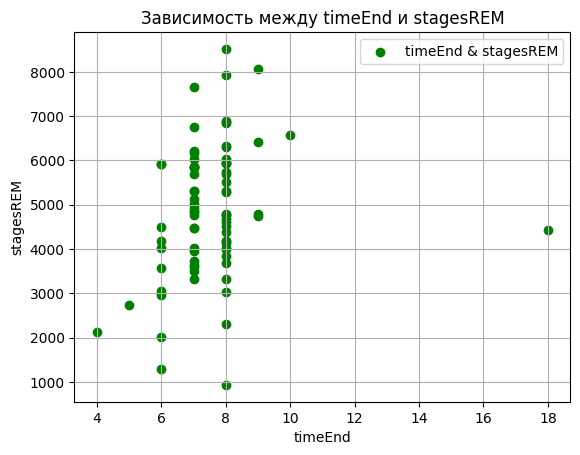

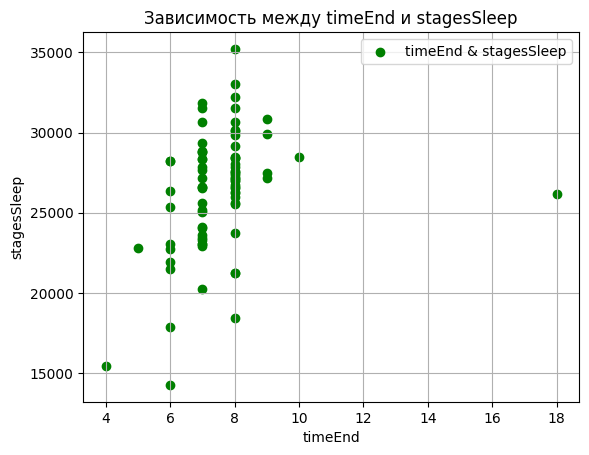

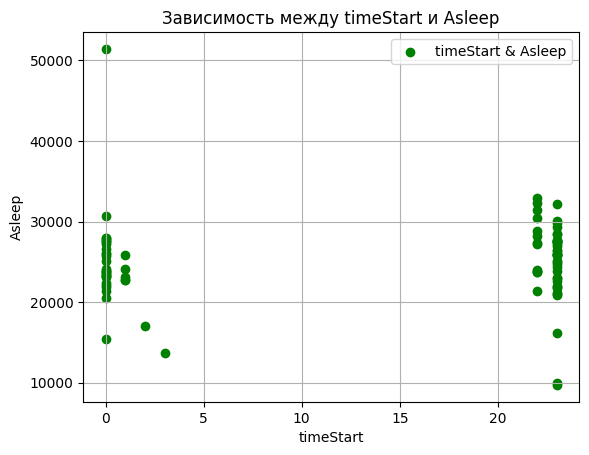

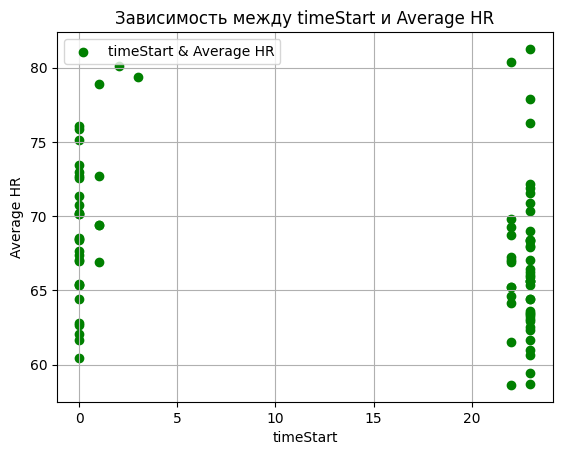

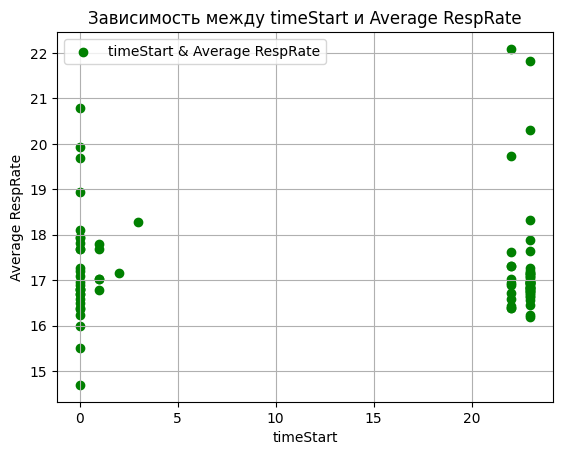

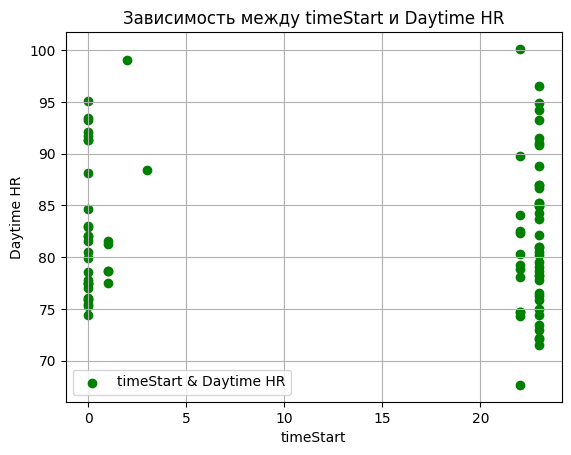

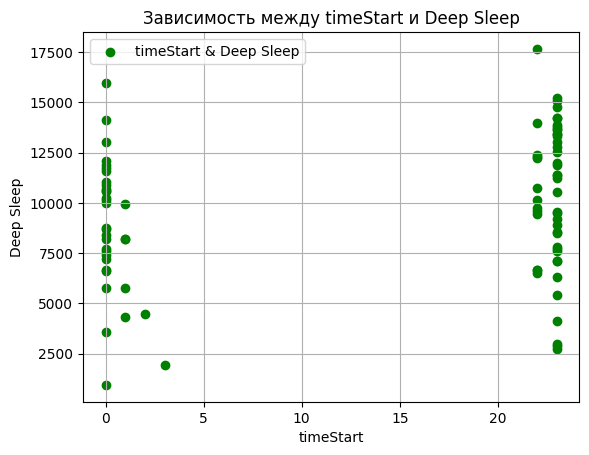

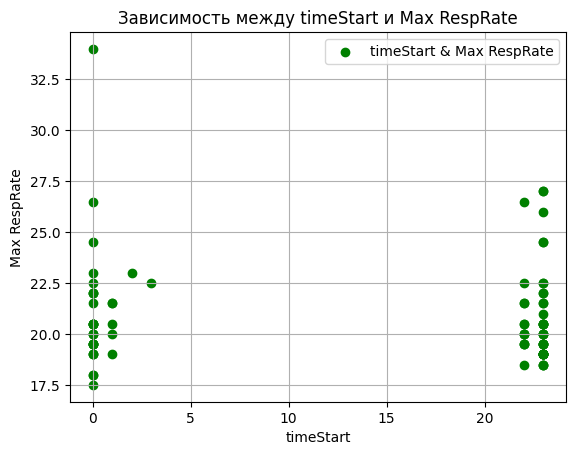

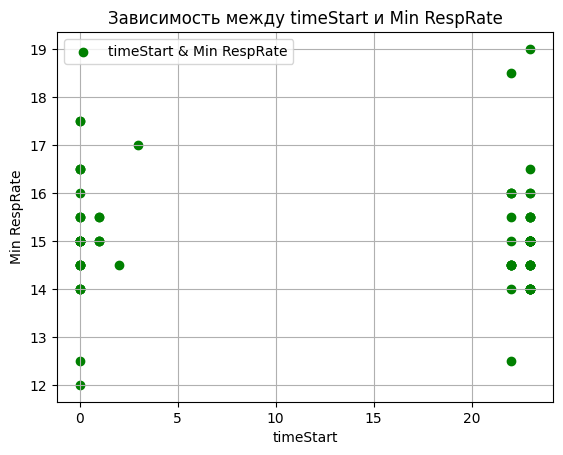

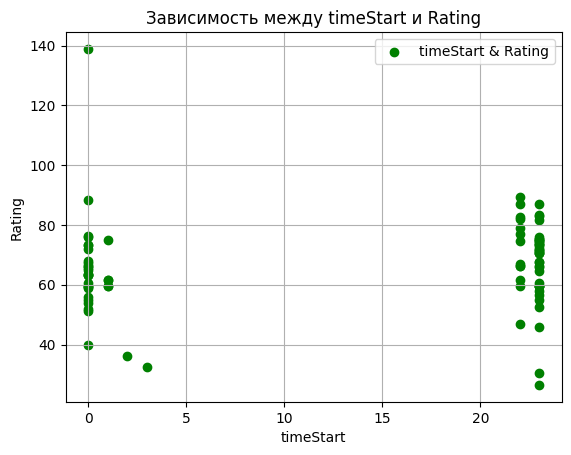

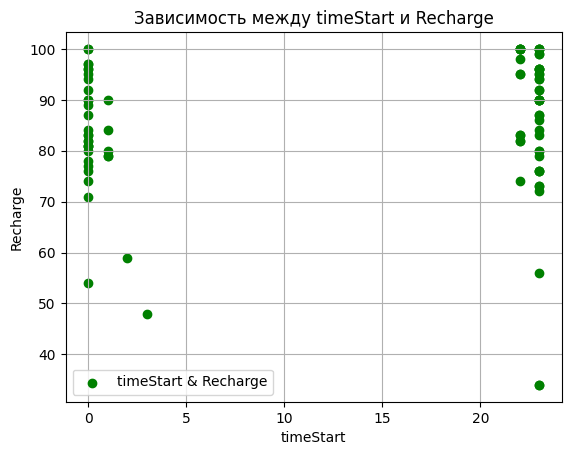

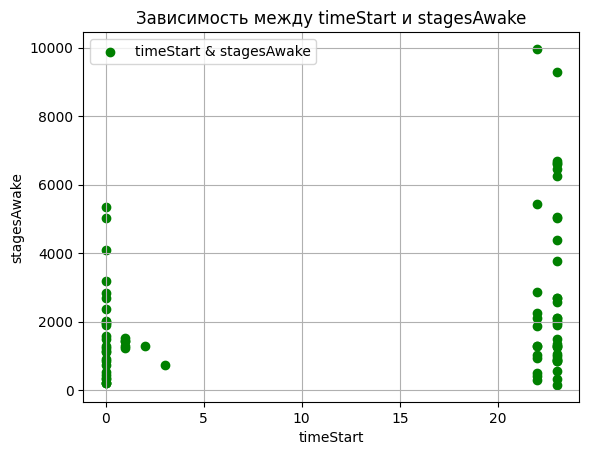

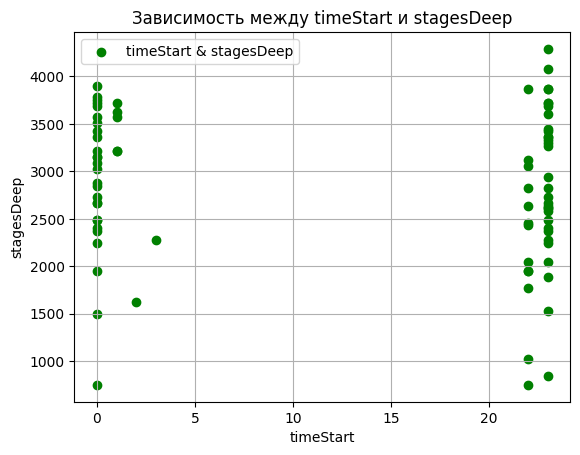

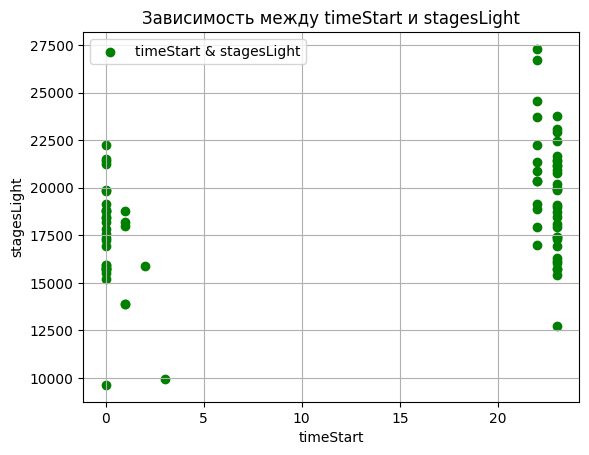

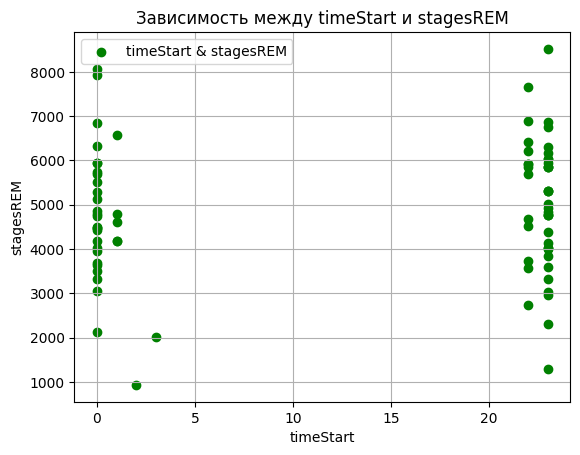

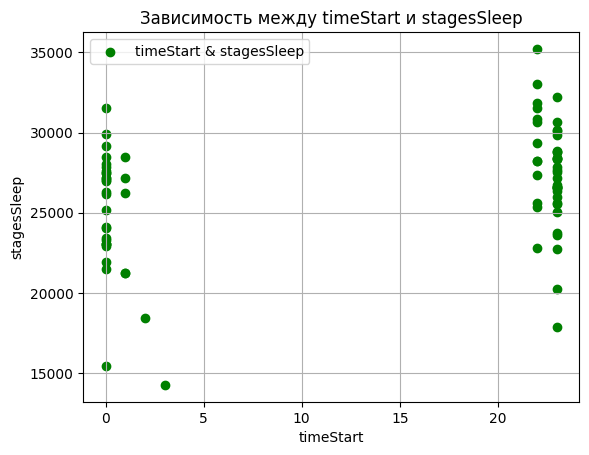

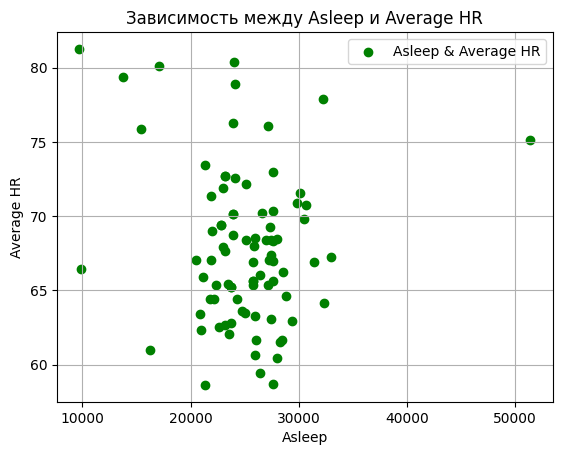

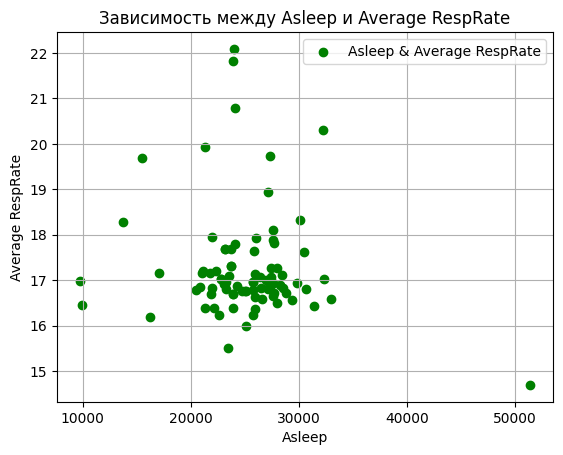

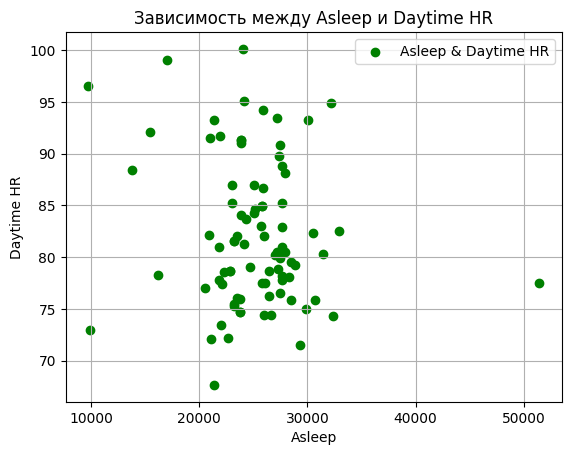

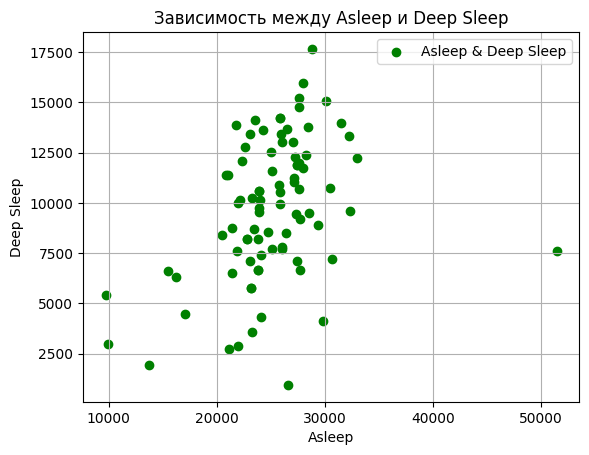

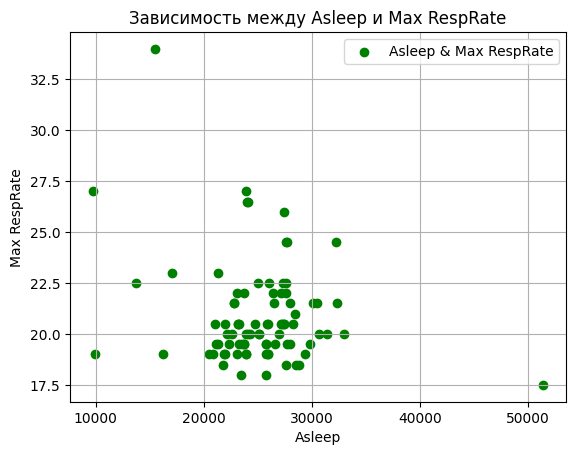

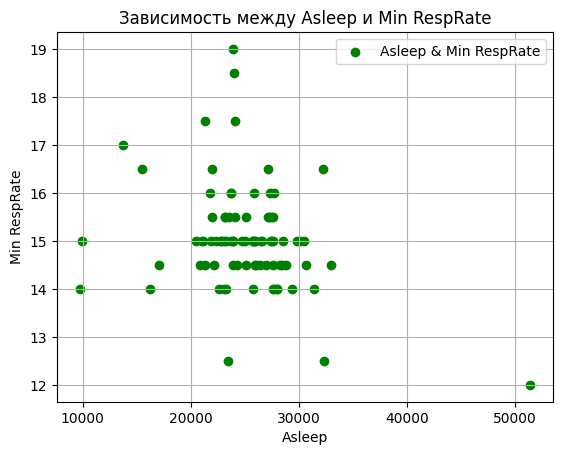

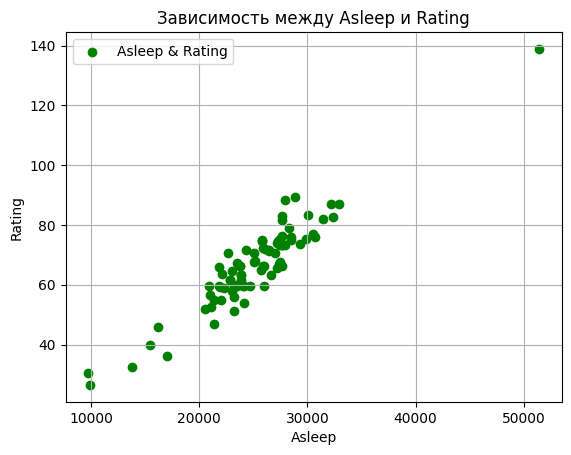

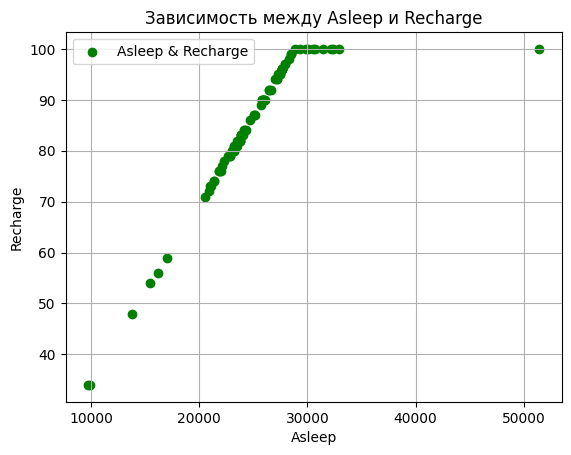

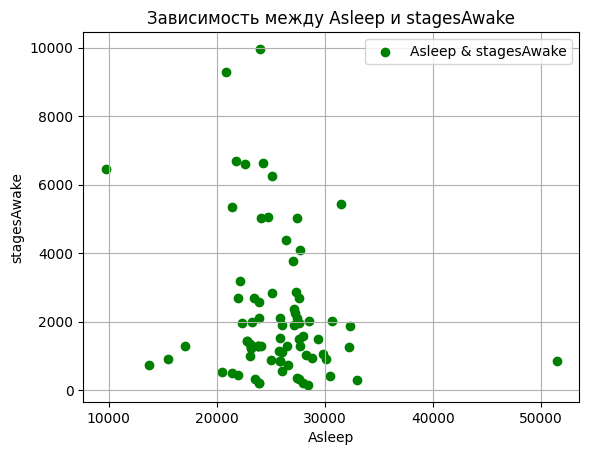

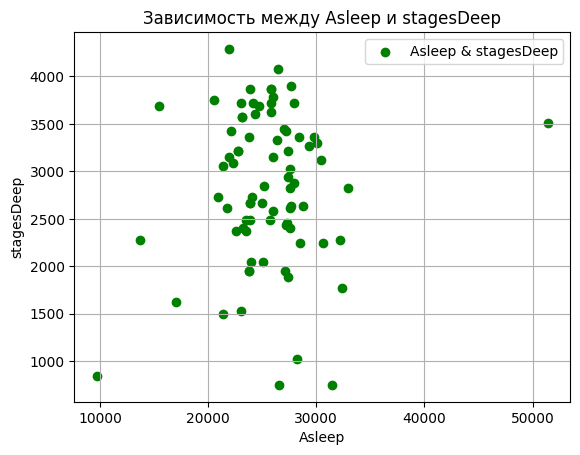

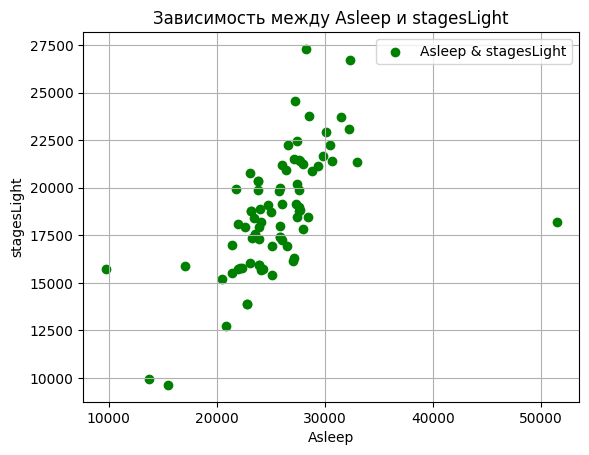

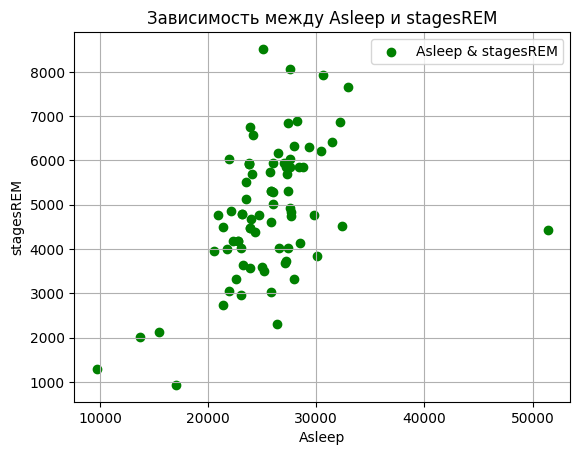

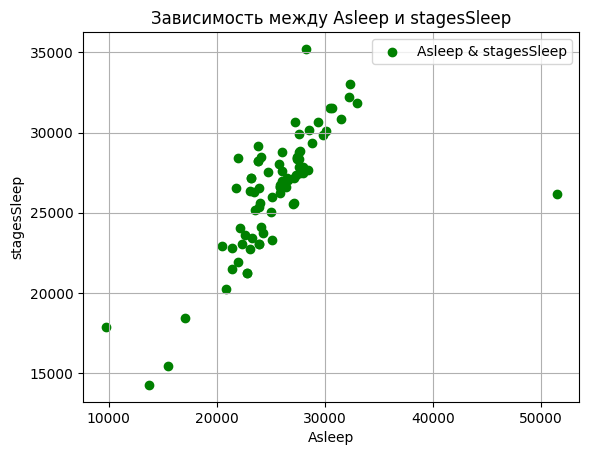

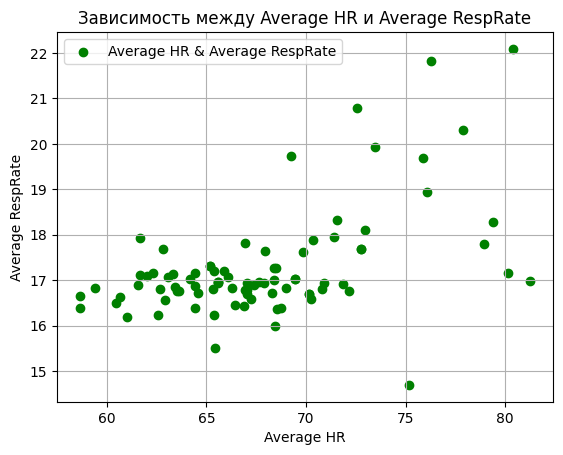

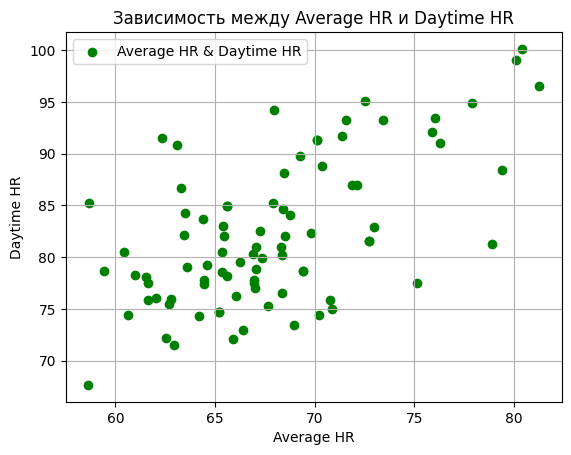

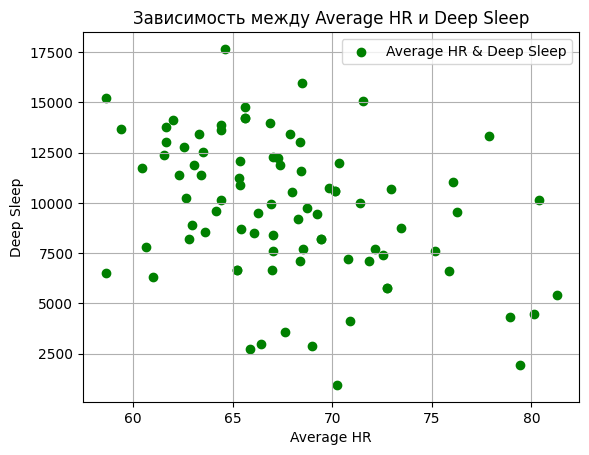

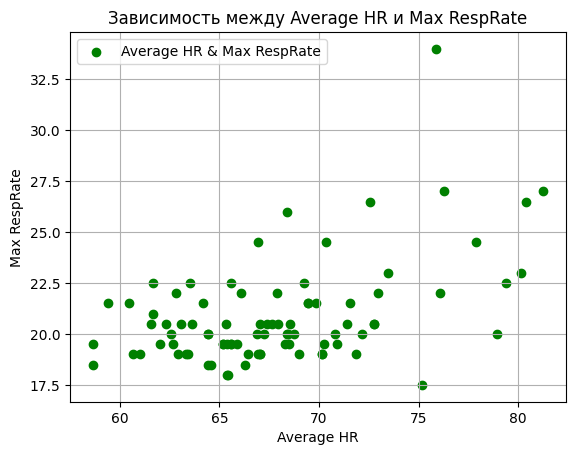

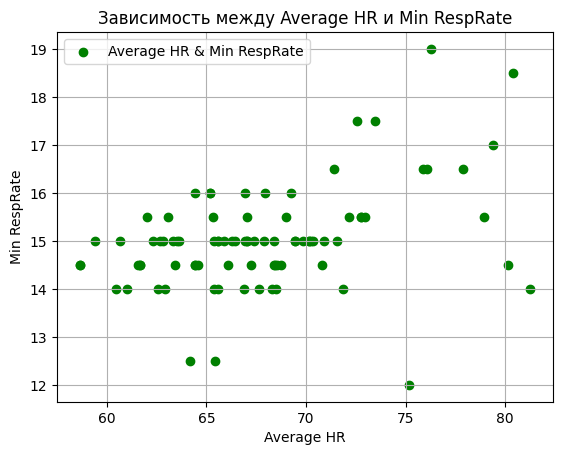

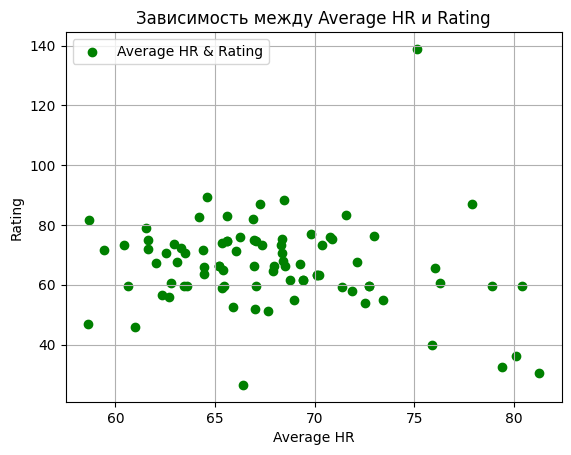

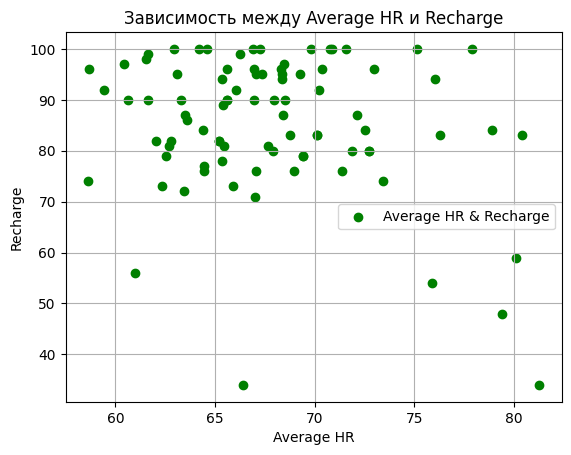

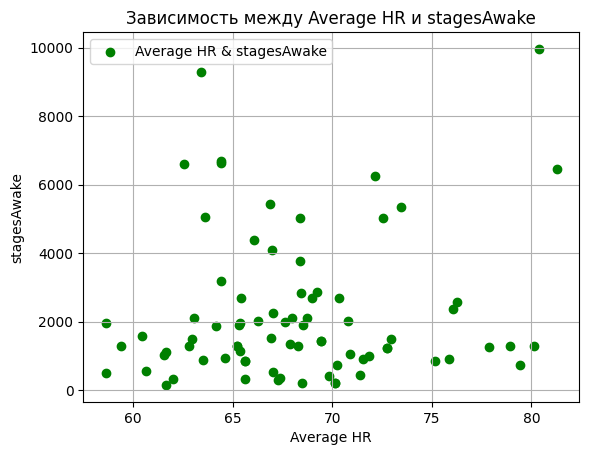

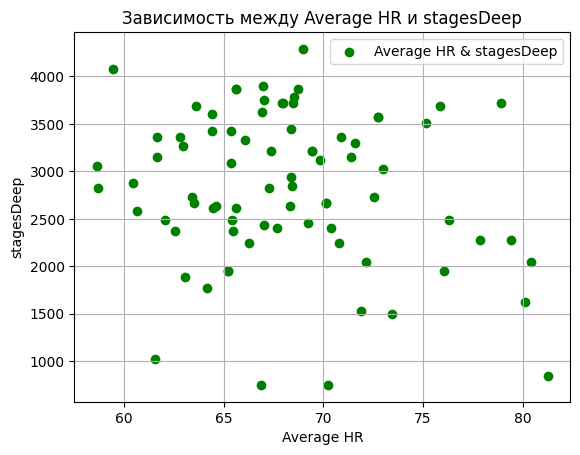

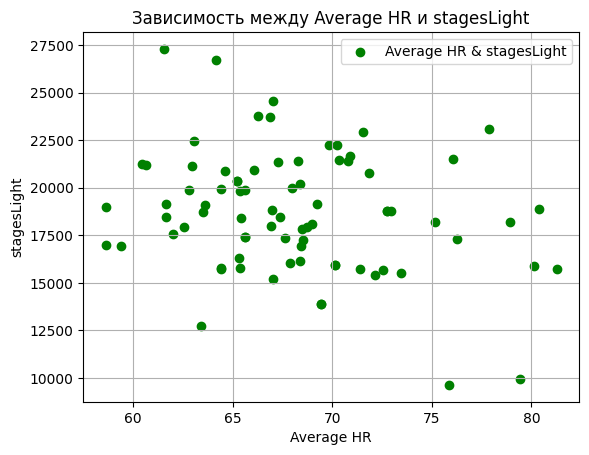

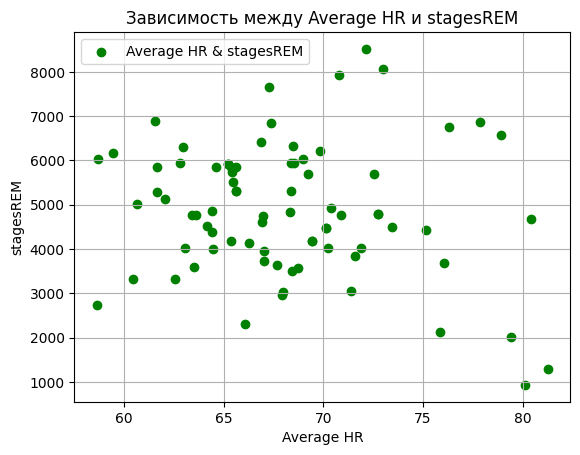

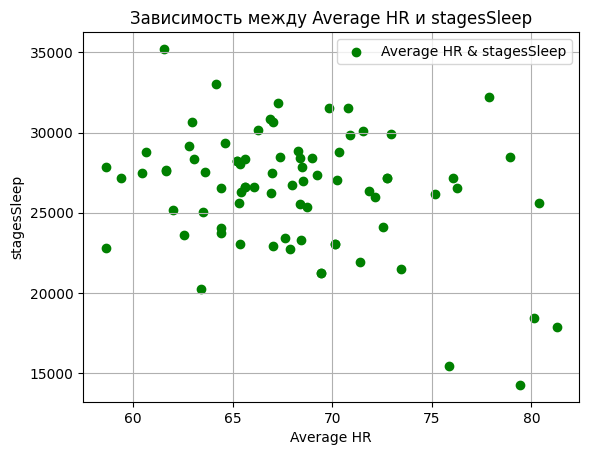

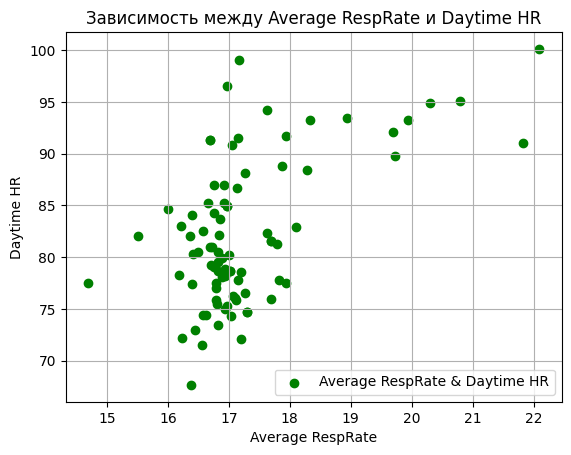

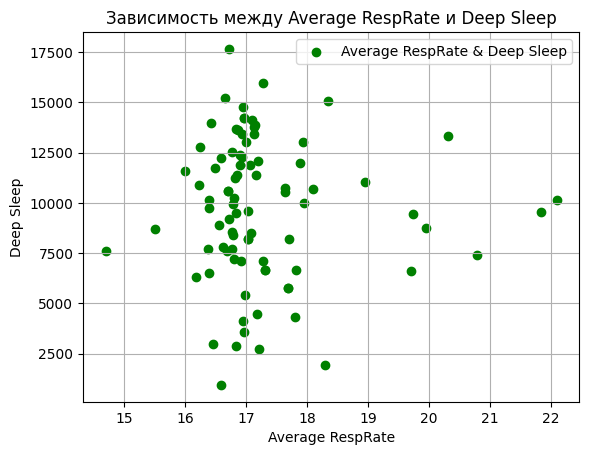

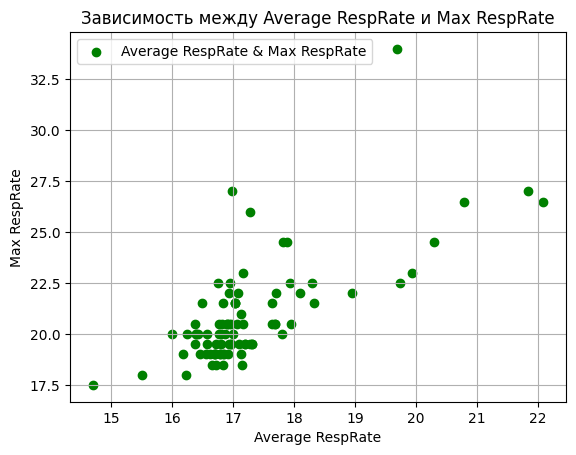

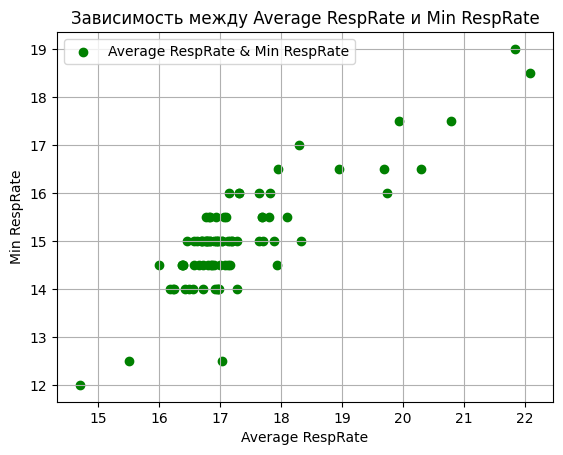

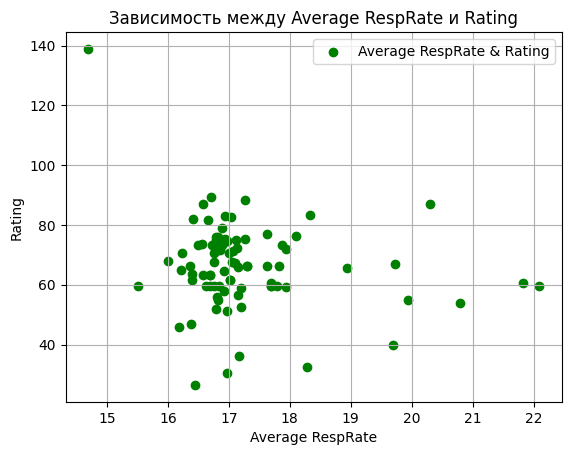

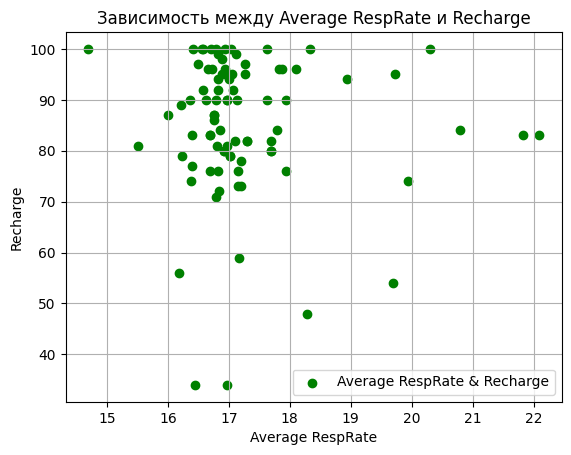

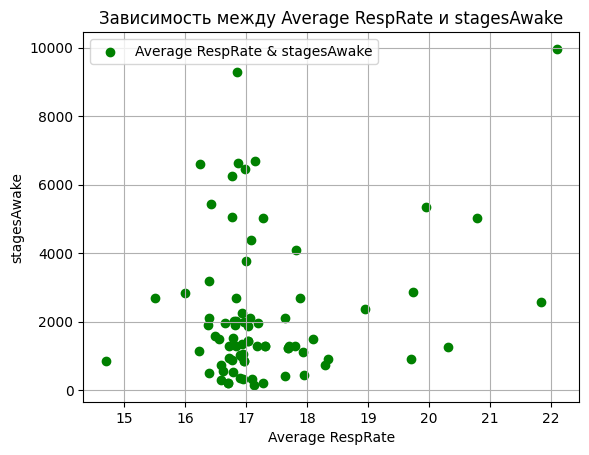

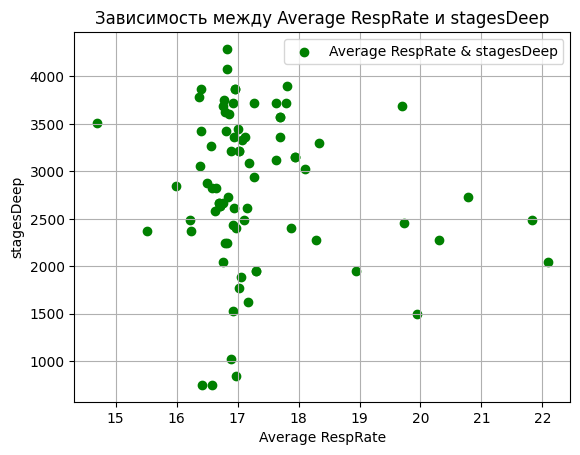

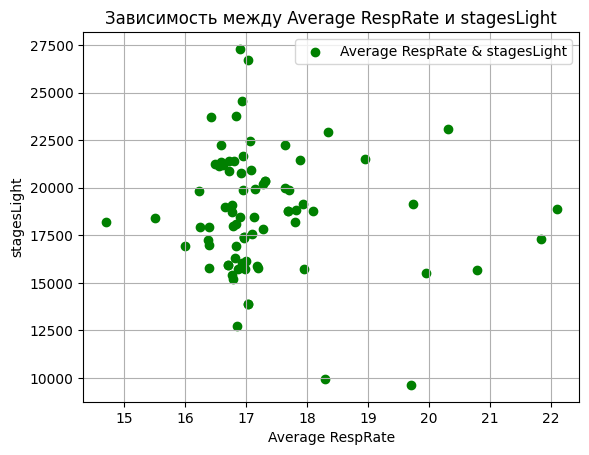

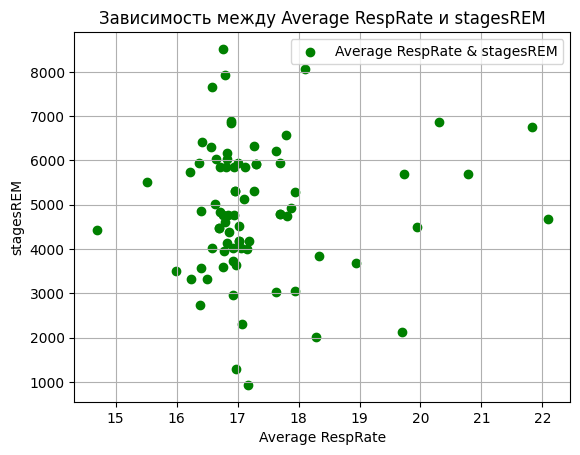

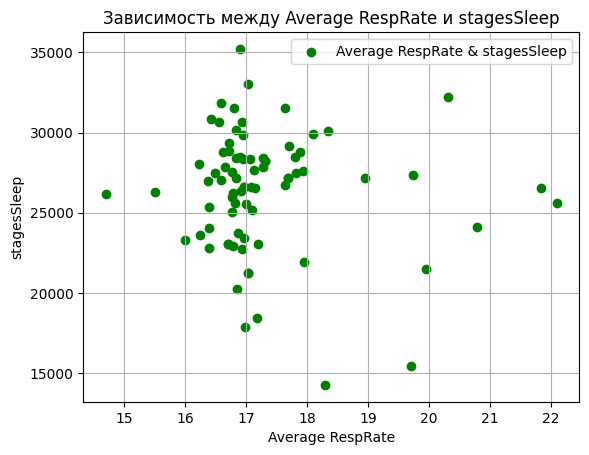

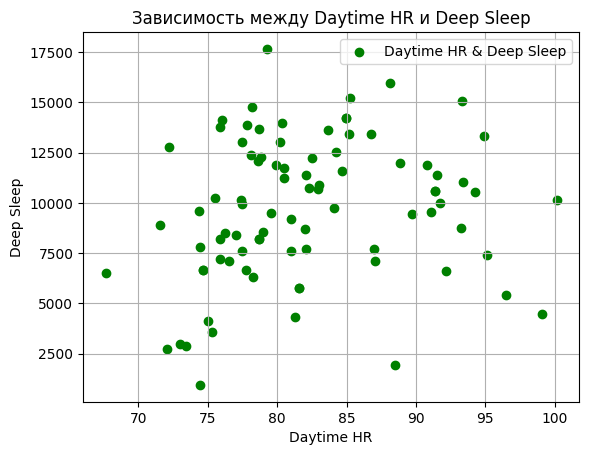

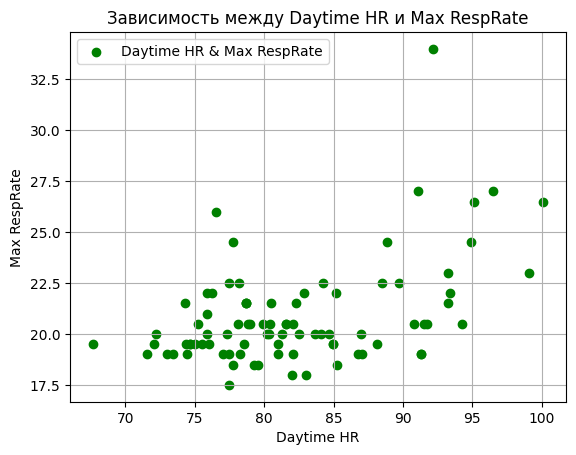

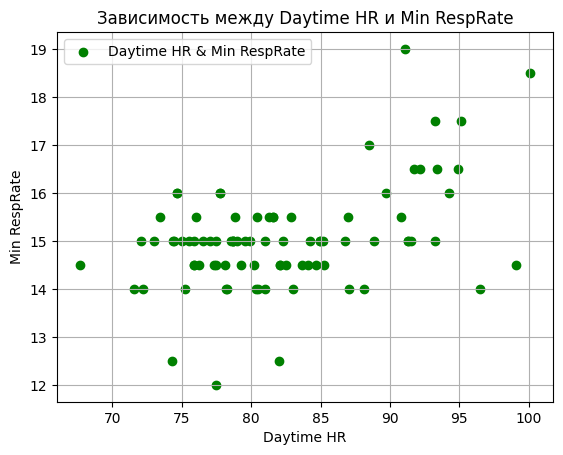

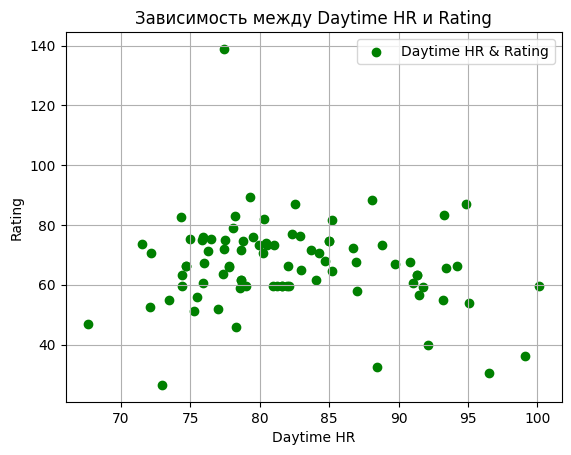

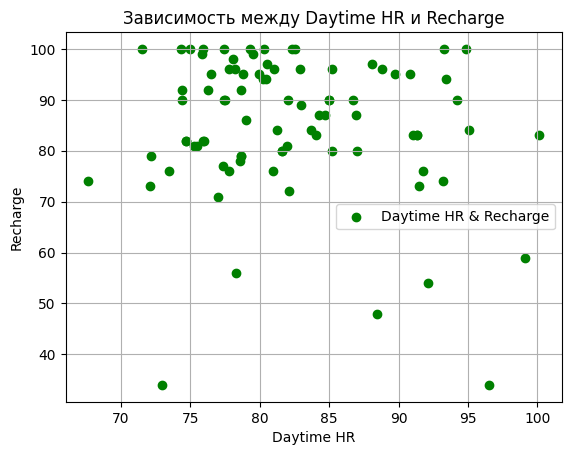

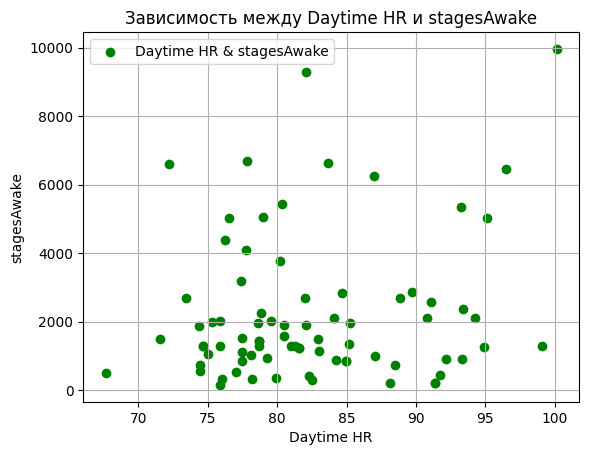

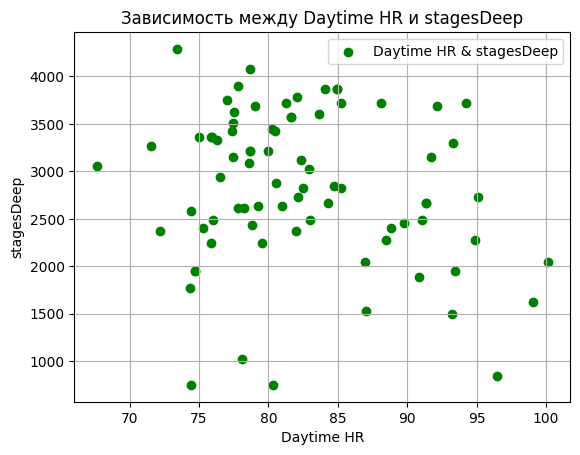

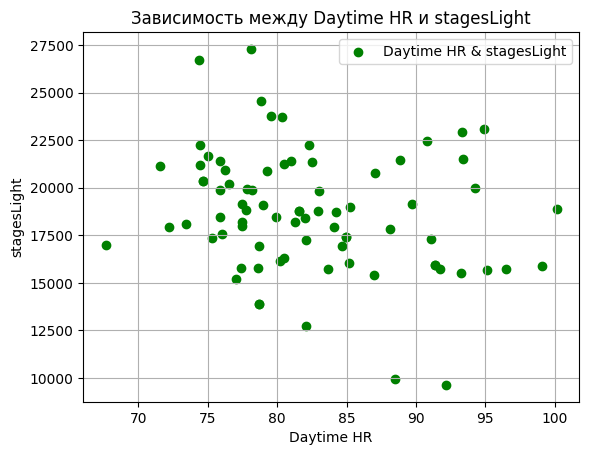

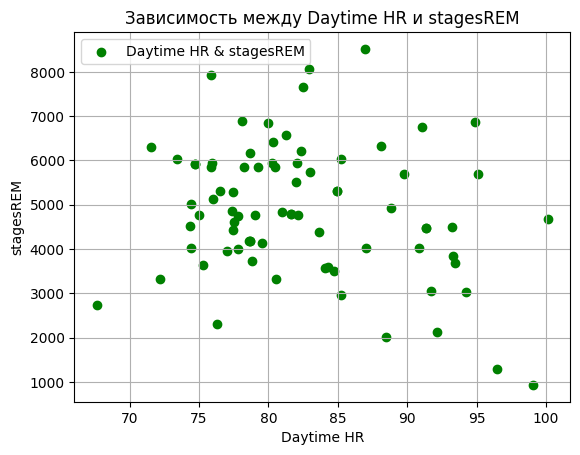

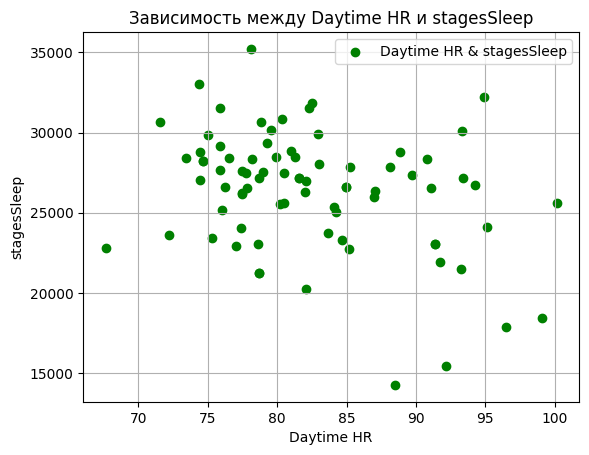

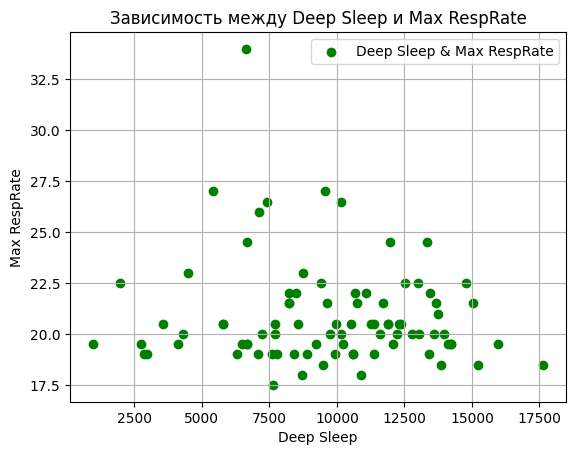

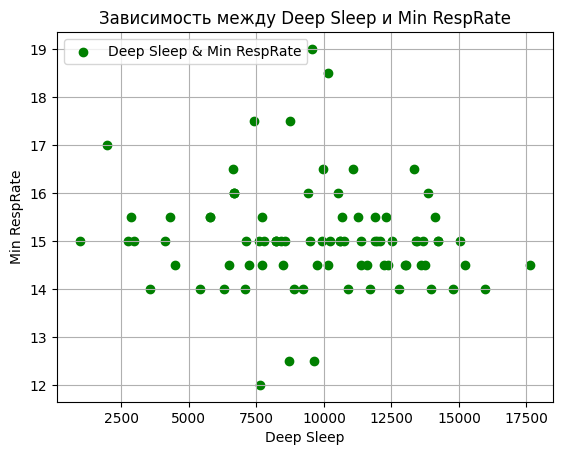

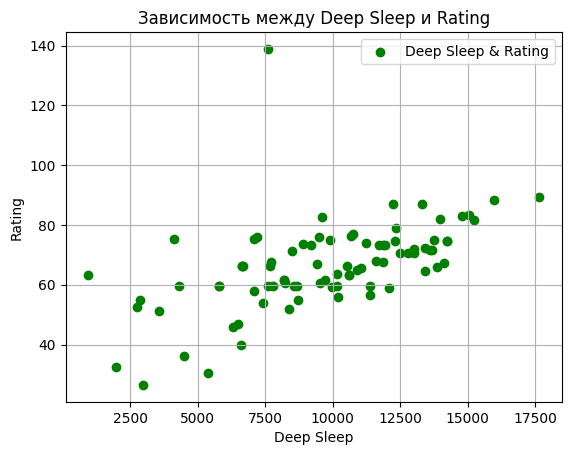

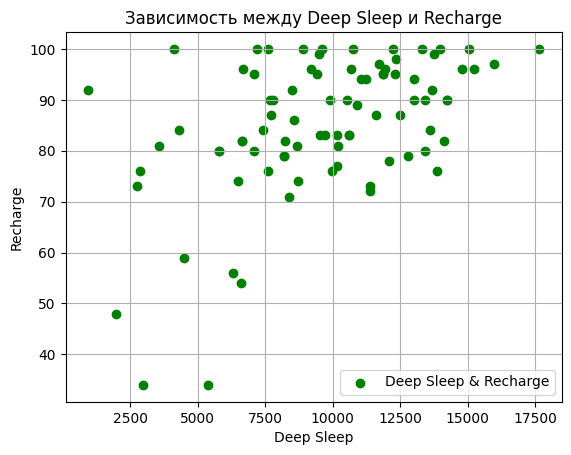

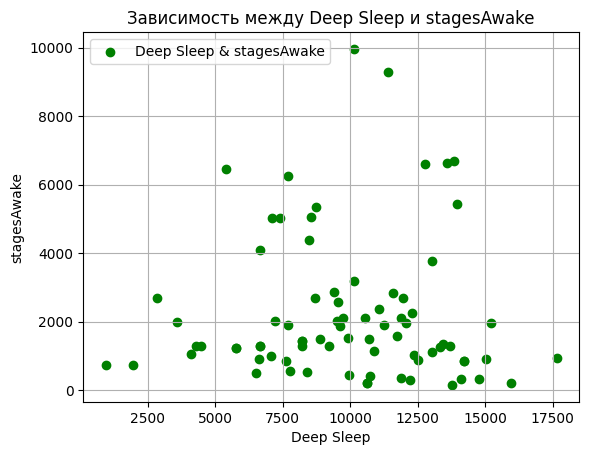

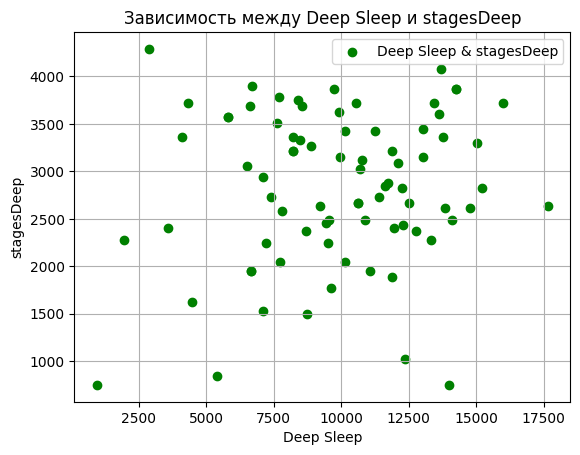

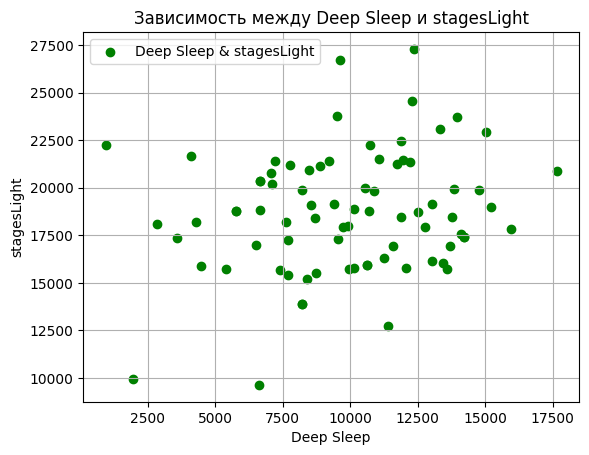

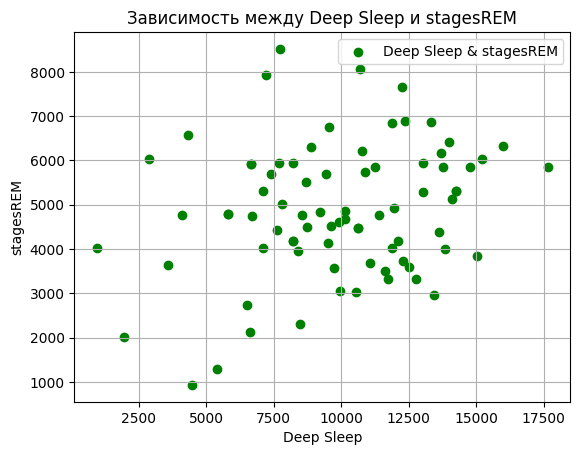

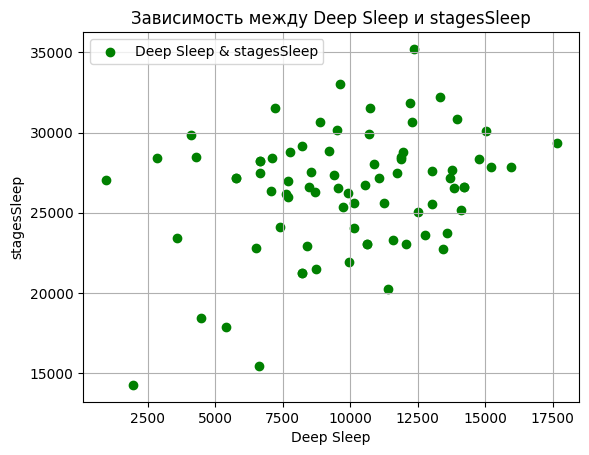

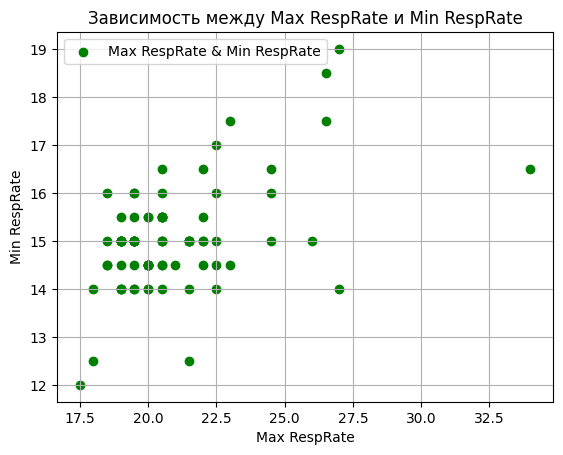

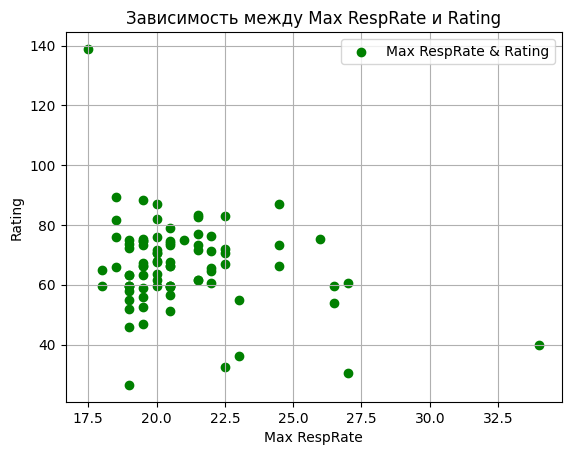

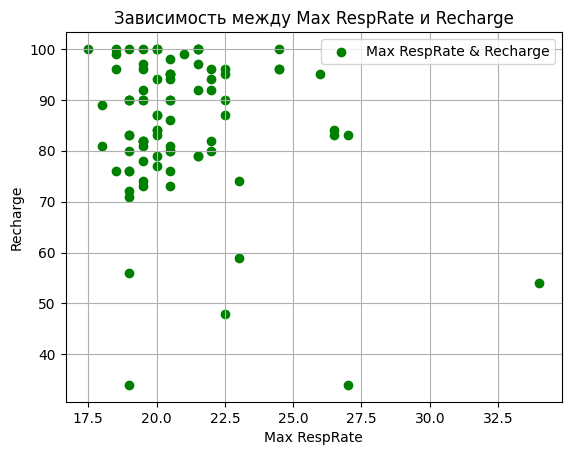

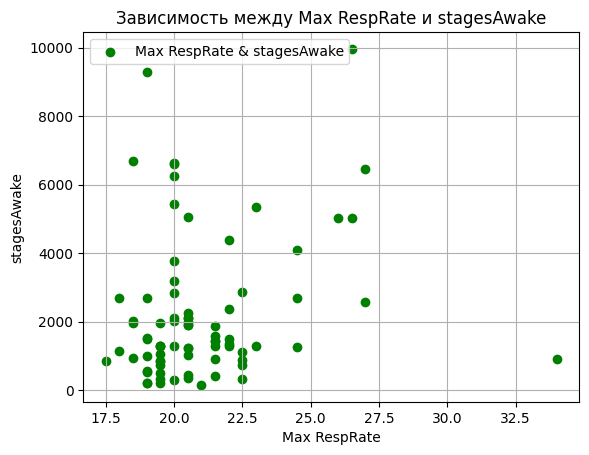

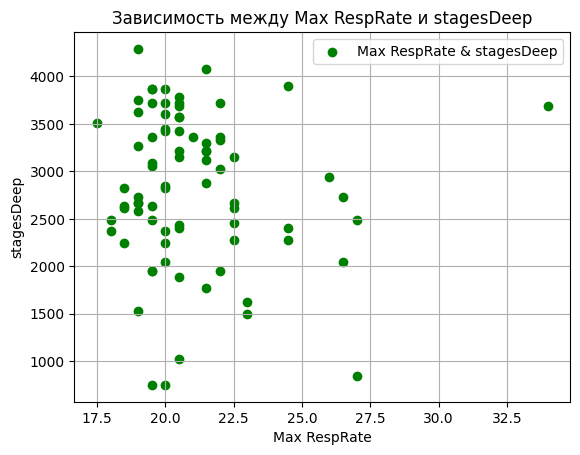

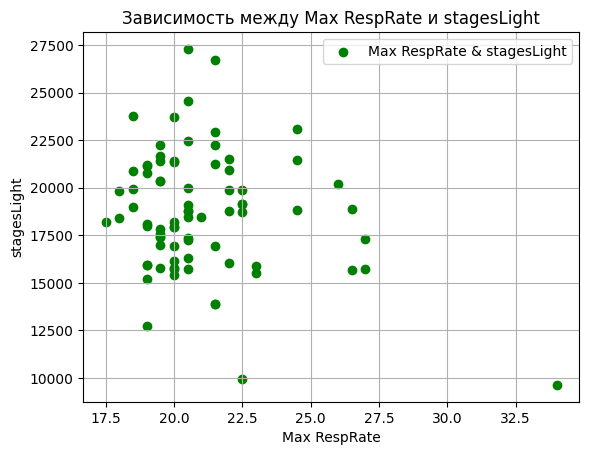

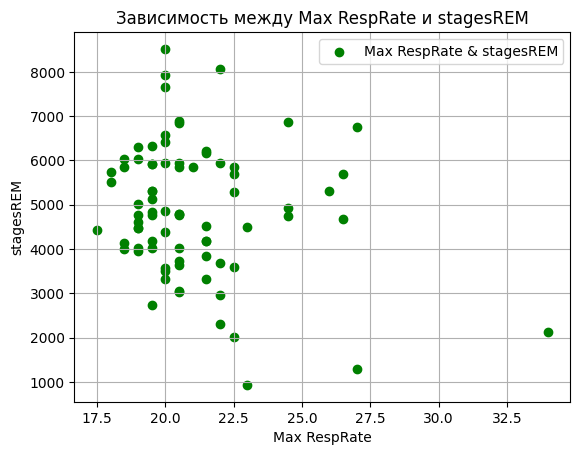

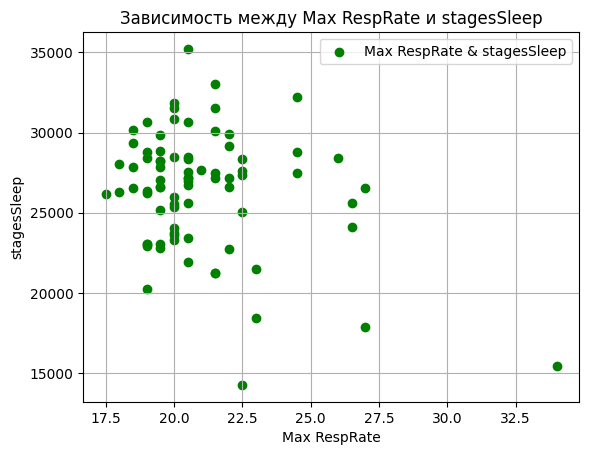

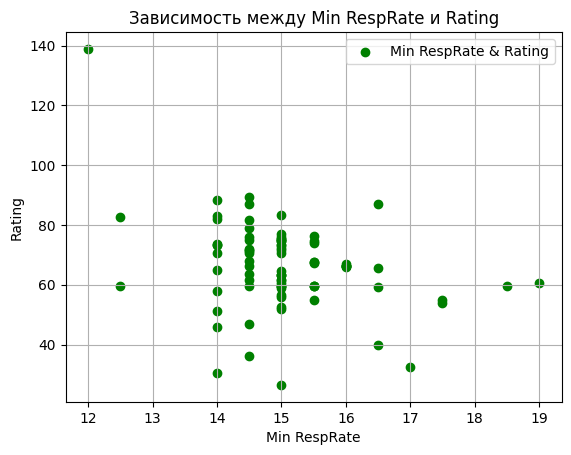

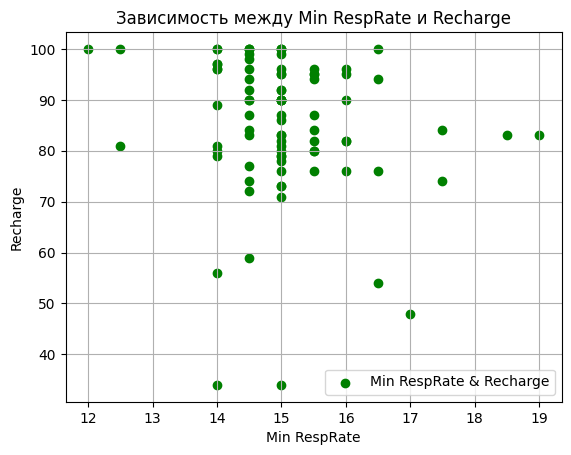

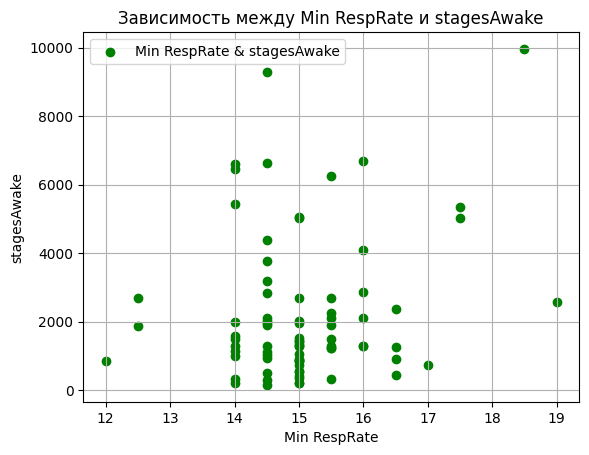

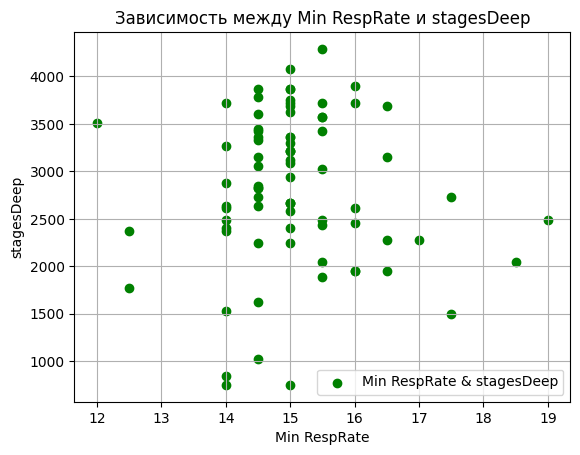

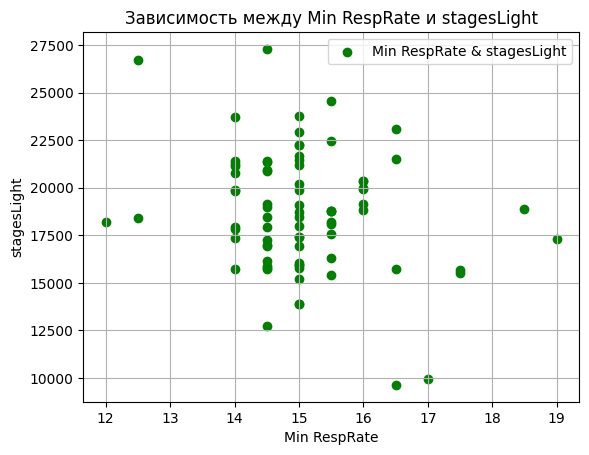

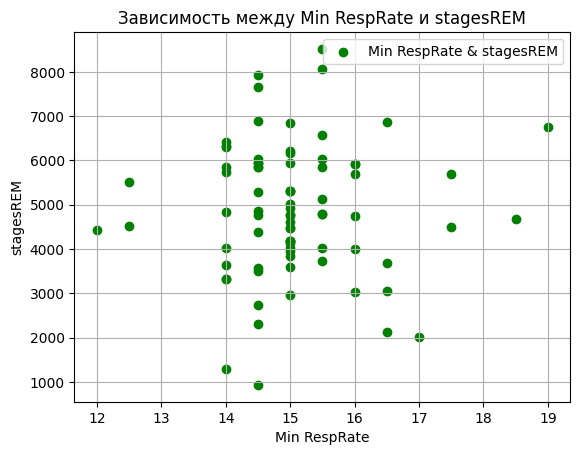

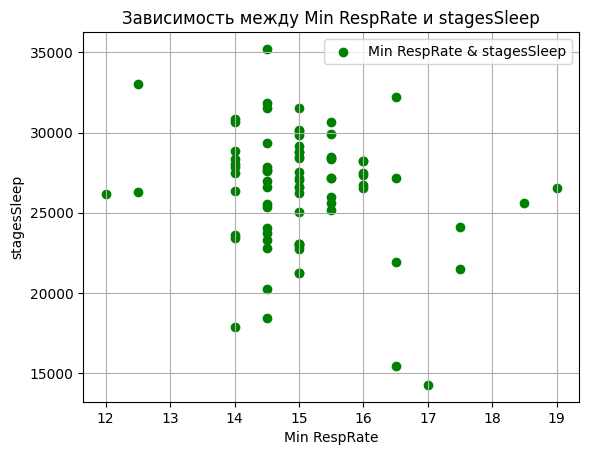

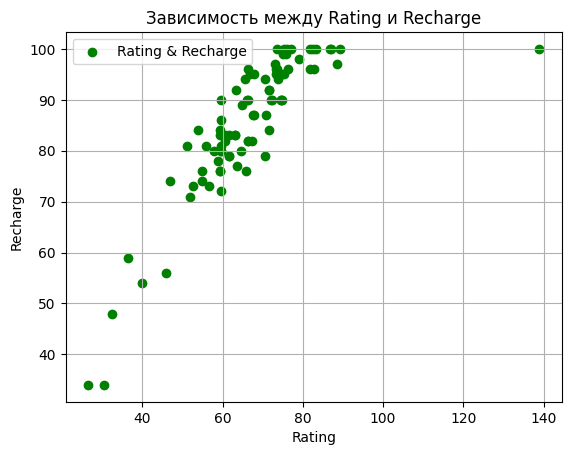

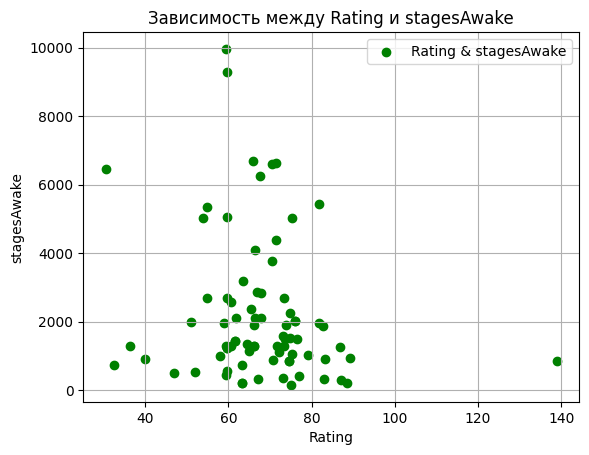

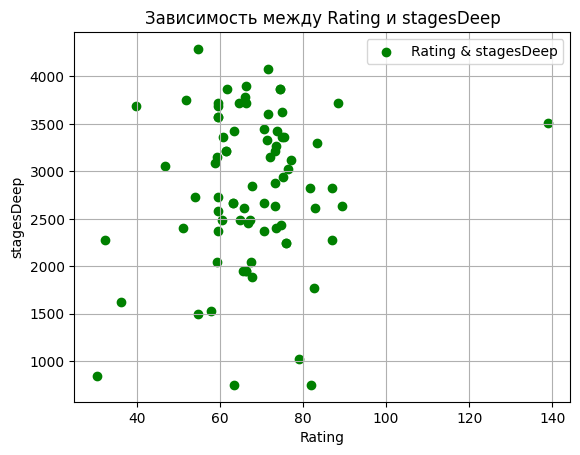

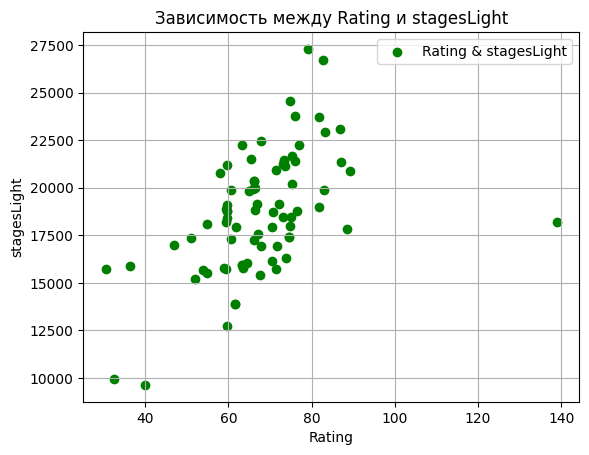

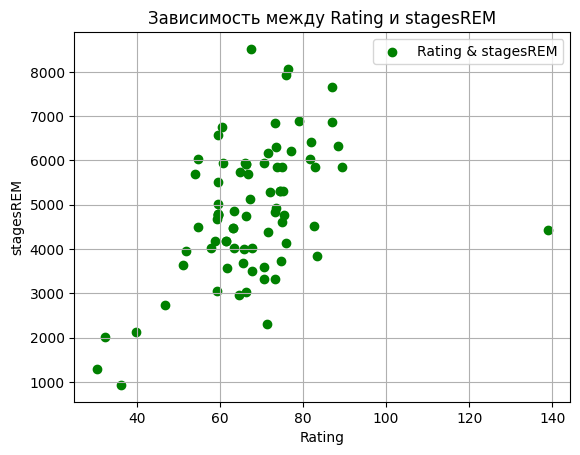

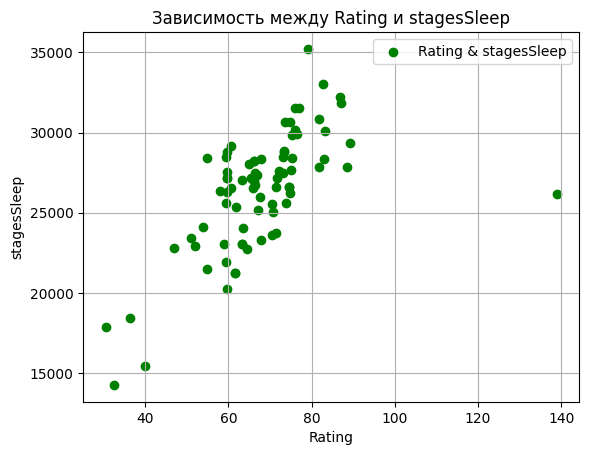

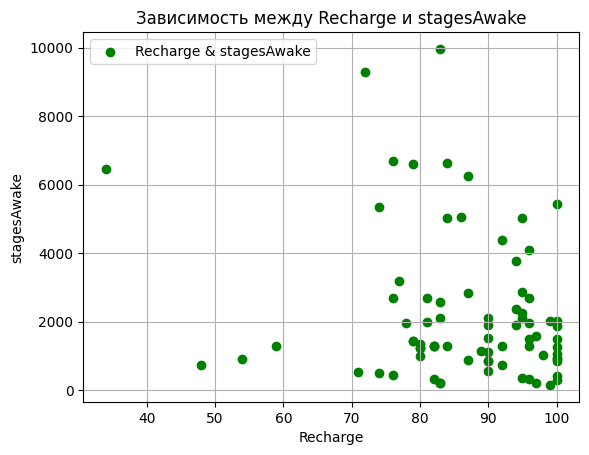

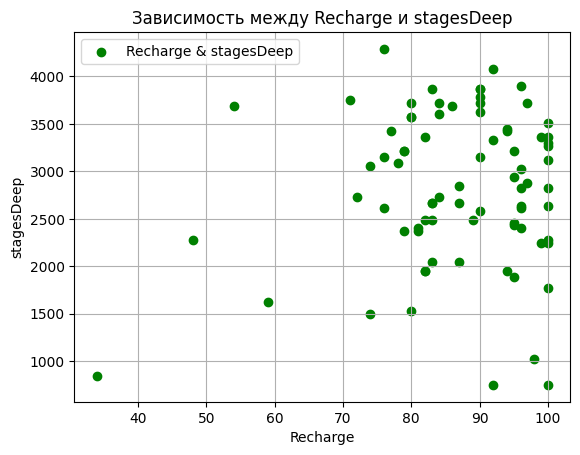

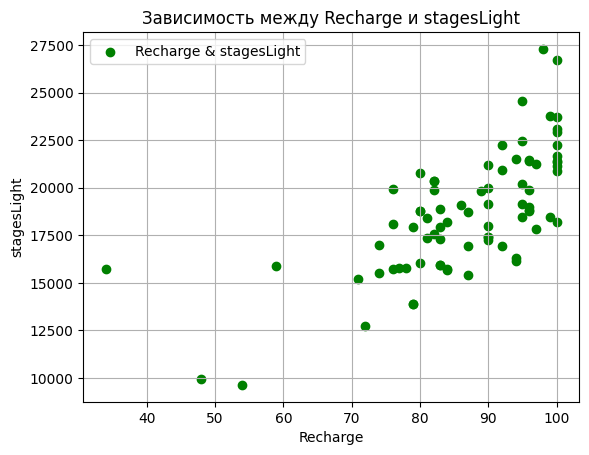

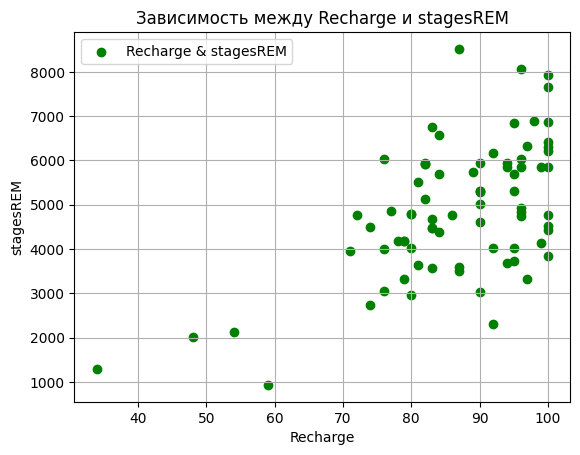

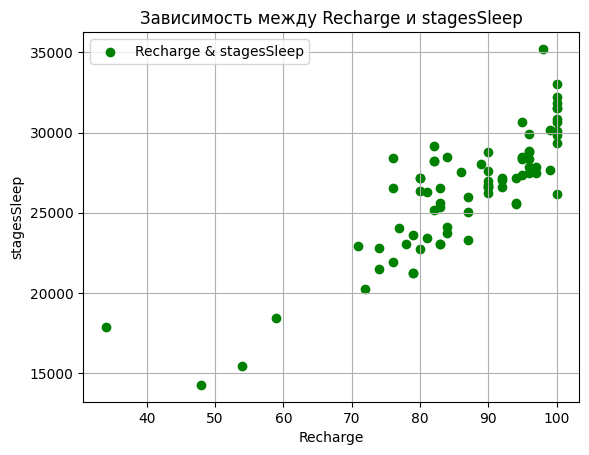

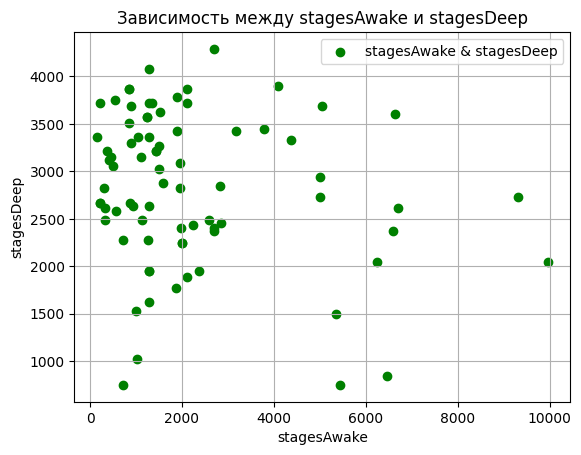

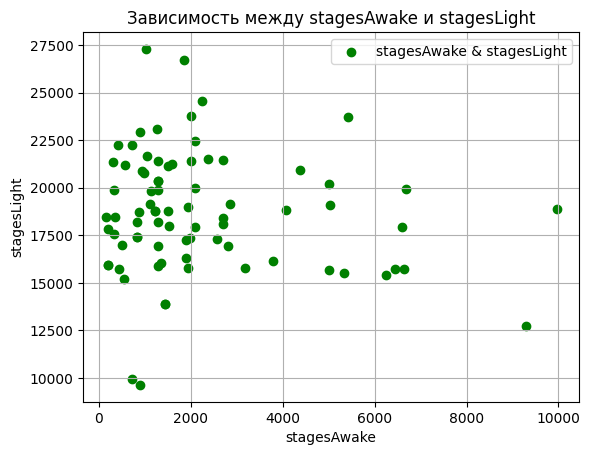

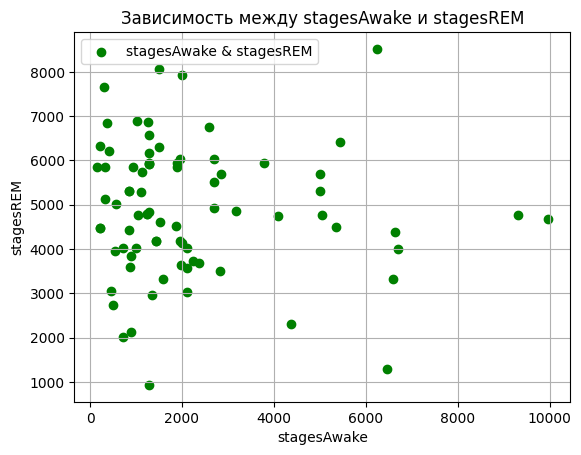

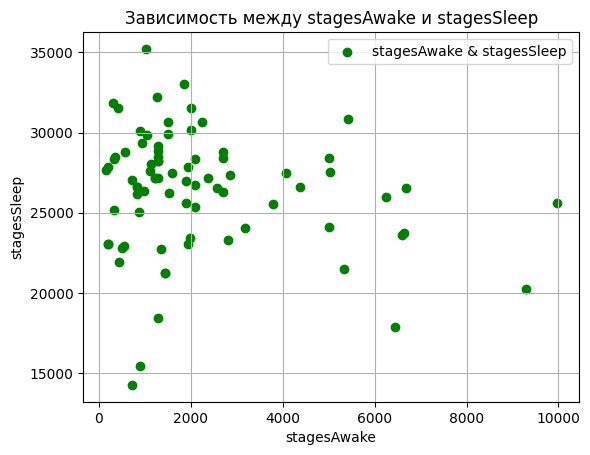

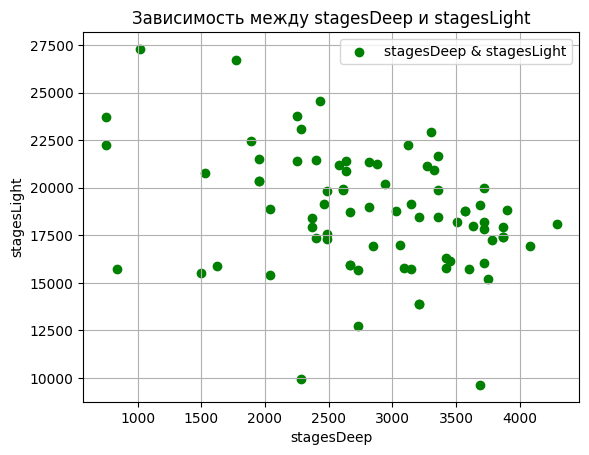

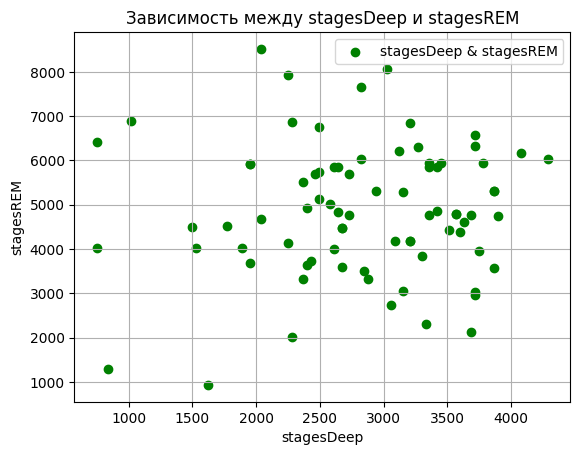

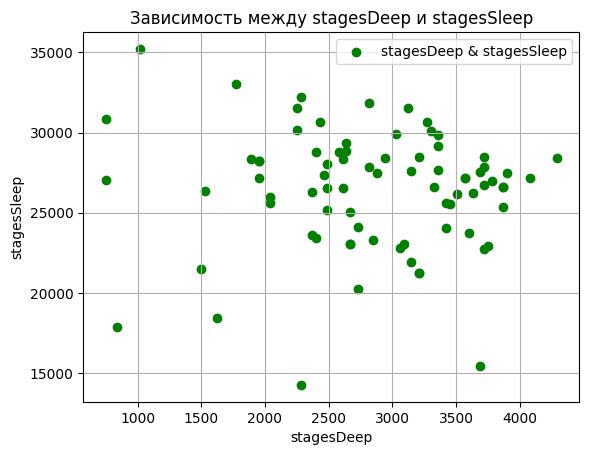

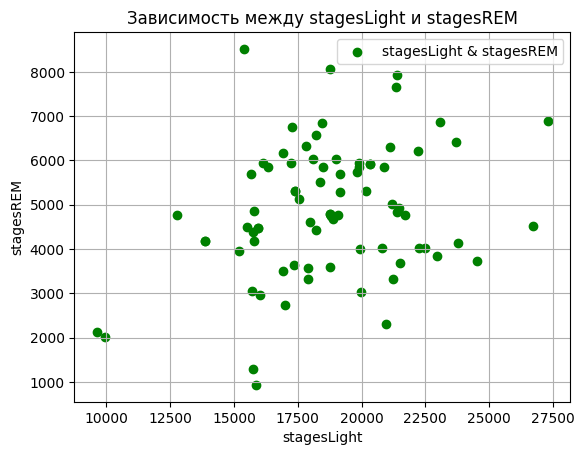

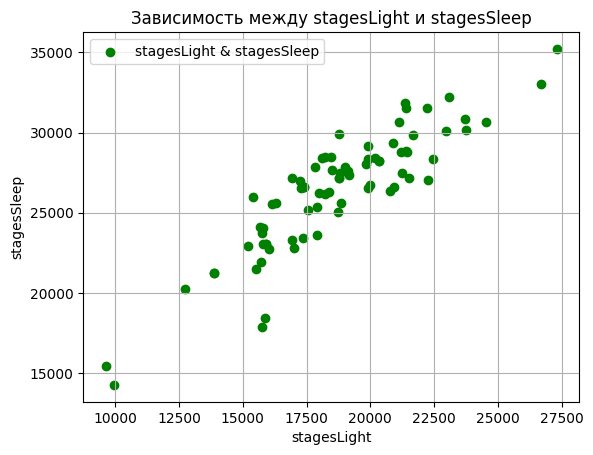

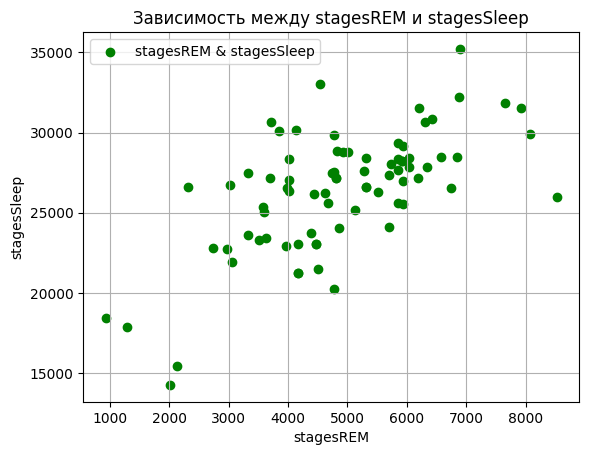

In [89]:
import itertools

plt.figure(figsize=(10, 6))
for (num1, num2) in itertools.combinations(numerical_features, 2):
    plt.scatter(df_1[num1], df_1[num2], label=f'{num1} & {num2}', color='green')
    plt.xlabel(num1)
    plt.ylabel(num2)
    plt.title(f'Зависимость между {num1} и {num2}')
    plt.legend()
    plt.grid()
    plt.show()

На графиках видны 2 группы. Например, между временем начала сна и четырьмя стадиями сна.

# Разбор df_2